# Import packages

First thing first: import my packages. I always import pandas, numpy, and matplotlib.pyplot at the beginning of every notebook I write, because I know I will need to use them very soon.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Other packages will be added later as I go with the analysis. For example, I need tensorflow for modeling, I will import tensorflow in a separated code cell right before the step of building the model. Then I might go back and move the importing cells up here and reorganize them after I am done with everything.

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
from scipy import stats

# Import data

Second thing second: import my data. I usually upload the file directly if it is small enough. Otherwise, I will upload it on to a cloud drive then add a connection. This file is small, so I upload it directly, hence the one-line code for importing data. Connecting to a drive will need longer code for sure (and probably some authentication steps and troubleshooting).

In [ ]:
df = pd.read_csv('salaries.csv')

# Explore the basics

In [ ]:
df.head()

work_year experience_level employment_type             job_title  \
0       2024               MI              FT  Admin & Data Analyst   
1       2024               MI              FT  Admin & Data Analyst   
2       2022               SE              FT  Admin & Data Analyst   
3       2023               EN              FT  Admin & Data Analyst   
4       2022               SE              FT          AI Architect   

  job_title_recode  salary salary_currency  salary_in_usd employee_residence  \
0          Analyst   95000             USD          95000                 US   
1          Analyst   38000             EUR          42222                 ES   
2          Analyst   60000             USD          60000                 IN   
3          Analyst   50000             USD          50000                 DE   
4        Architect  180000             USD         180000                 HR   

   remote_ratio company_location company_size  
0             0               US            M  
1           100               ES            L  
2           100               IN            M  
3             0               DE            M  
4           100               US            M

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16534 entries, 0 to 16533
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16534 non-null  int64 
 1   experience_level    16534 non-null  object
 2   employment_type     16534 non-null  object
 3   job_title           16534 non-null  object
 4   job_title_recode    16534 non-null  object
 5   salary              16534 non-null  int64 
 6   salary_currency     16534 non-null  object
 7   salary_in_usd       16534 non-null  int64 
 8   employee_residence  16534 non-null  object
 9   remote_ratio        16534 non-null  int64 
 10  company_location    16534 non-null  object
 11  company_size        16534 non-null  object
dtypes: int64(4), object(8)
memory usage: 1.5+ MB


## The target variable: Salary in USD

In [ ]:
df.salary_in_usd.describe()

count     16534.000000
mean     149686.777973
std       68505.293156
min       15000.000000
25%      101125.000000
50%      141300.000000
75%      185900.000000
max      800000.000000
Name: salary_in_usd, dtype: float64

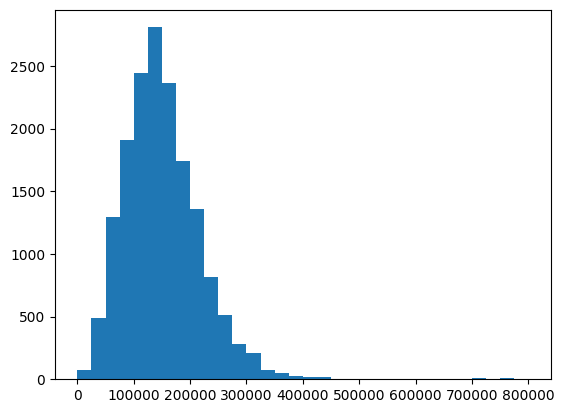

In [ ]:
bins = np.arange(0, 825000, 25000)
df.salary_in_usd.hist(bins=bins)
plt.grid(False)
plt.show()

## Work year

In [ ]:
df.work_year.unique()

array([2024, 2022, 2023, 2021, 2020])

In [ ]:
df.work_year.value_counts()

work_year
2023    8519
2024    6067
2022    1655
2021     218
2020      75
Name: count, dtype: int64

In [ ]:
df.work_year.value_counts()/16534*100

work_year
2023    51.524132
2024    36.694085
2022    10.009677
2021     1.318495
2020     0.453611
Name: count, dtype: float64

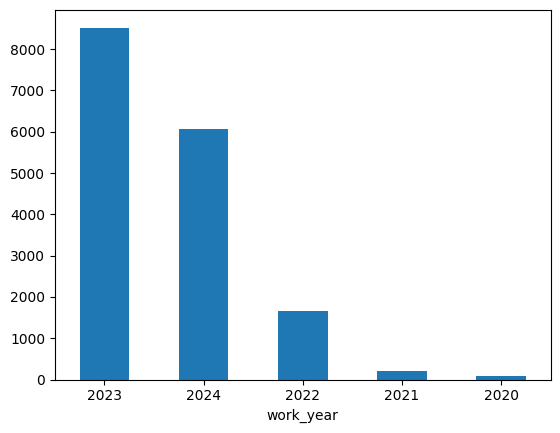

In [ ]:
df.work_year.value_counts().plot.bar()
plt.grid(False)
plt.xticks(rotation=0)
plt.show()

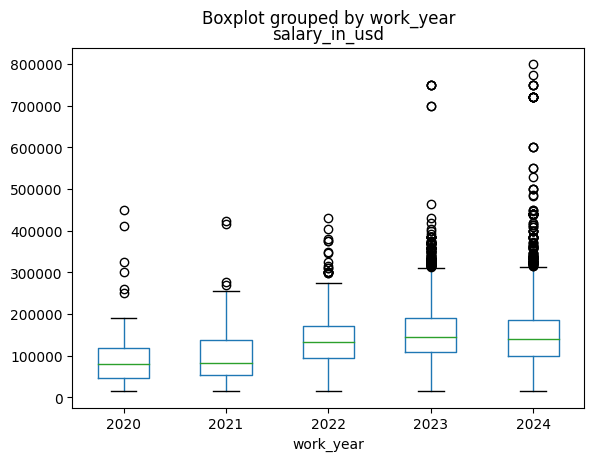

In [ ]:
df.boxplot(by='work_year', column =['salary_in_usd'], grid = False)
plt.show()

## Experience level

In [ ]:
df.experience_level.unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [ ]:
df.experience_level.value_counts()

experience_level
SE    10670
MI     4038
EN     1325
EX      501
Name: count, dtype: int64

In [ ]:
df.experience_level.value_counts()/16534*100

experience_level
SE    64.533688
MI    24.422402
EN     8.013790
EX     3.030120
Name: count, dtype: float64

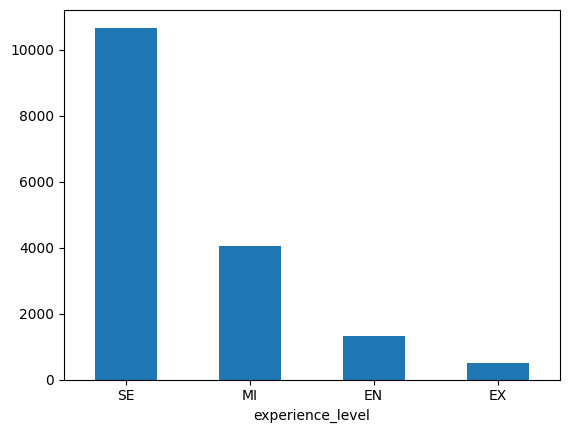

In [ ]:
df.experience_level.value_counts().plot.bar()
plt.grid(False)
plt.xticks(rotation=0)
plt.show()

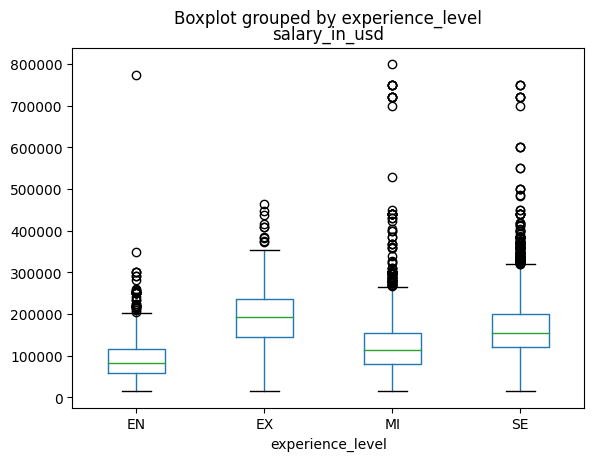

In [ ]:
df.boxplot(by='experience_level', column =['salary_in_usd'], grid = False)
plt.show()

## Employment type

In [ ]:
df.employment_type.unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

In [ ]:
df.employment_type.value_counts()

employment_type
FT    16454
PT       38
CT       28
FL       14
Name: count, dtype: int64

In [ ]:
df.employment_type.value_counts()/16534*100

employment_type
FT    99.516149
PT     0.229829
CT     0.169348
FL     0.084674
Name: count, dtype: float64

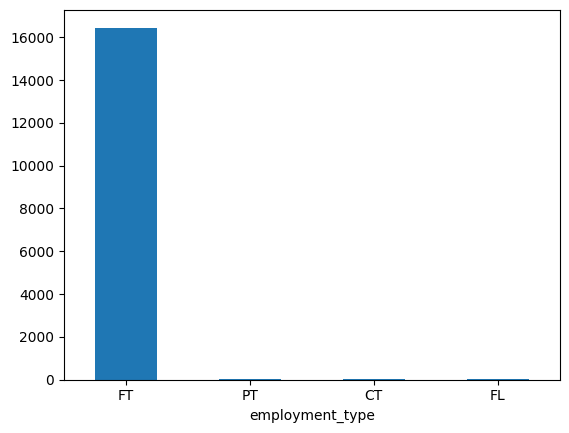

In [ ]:
df.employment_type.value_counts().plot.bar()
plt.grid(False)
plt.xticks(rotation=0)
plt.show()

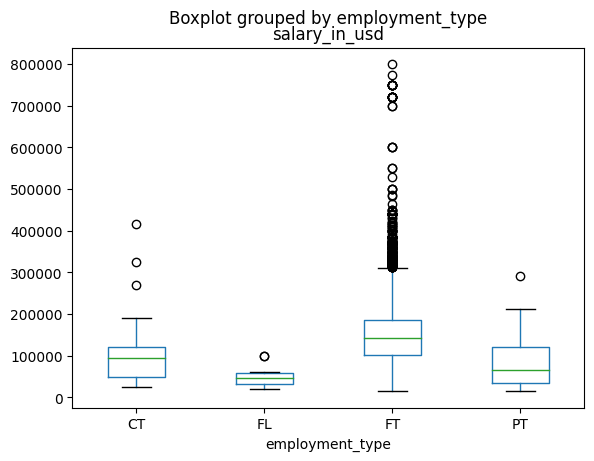

In [ ]:
df.boxplot(by='employment_type', column =['salary_in_usd'], grid = False)
plt.show()

## Job Title

In [ ]:
df.job_title.unique()

array(['Admin & Data Analyst', 'AI Architect', 'AI Developer',
       'AI Engineer', 'AI Product Manager', 'AI Programmer',
       'AI Research Engineer', 'AI Research Scientist', 'AI Scientist',
       'AI Software Engineer', 'Analytics Engineer',
       'Analytics Engineering Manager', 'Applied Data Scientist',
       'Applied Machine Learning Engineer',
       'Applied Machine Learning Scientist', 'Applied Research Scientist',
       'Applied Scientist', 'Autonomous Vehicle Technician',
       'AWS Data Architect', 'Azure Data Engineer', 'Bear Robotics',
       'BI Analyst', 'BI Data Analyst', 'BI Data Engineer',
       'BI Developer', 'Big Data Architect', 'Big Data Developer',
       'Big Data Engineer', 'Business Data Analyst',
       'Business Intelligence', 'Business Intelligence Analyst',
       'Business Intelligence Data Analyst',
       'Business Intelligence Developer',
       'Business Intelligence Engineer', 'Business Intelligence Lead',
       'Business Intelligence Man

In [ ]:
df.job_title.unique().size

155

In [ ]:
job_title = pd.DataFrame(df.job_title.value_counts().copy())

In [ ]:
top_job_title = job_title.head(20)

In [ ]:
top_job_title

count
job_title                            
Data Engineer                    3464
Data Scientist                   3314
Data Analyst                     2440
Machine Learning Engineer        1705
Research Scientist                531
Data Architect                    435
Applied Scientist                 435
Analytics Engineer                431
Research Engineer                 306
Data Science                      271
Business Intelligence Engineer    248
Data Manager                      212
ML Engineer                       200
Business Intelligence Analyst     191
Machine Learning Scientist        138
Research Analyst                  123
Data Science Manager              122
AI Engineer                       120
Business Intelligence              98
BI Developer                       90

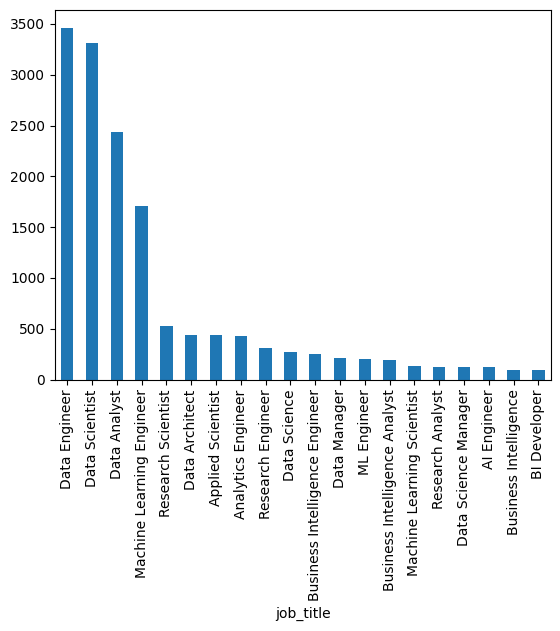

In [ ]:
top_job_title.plot.bar(legend=False)
plt.grid(False)
plt.xticks(rotation=90)
plt.show()

## Recode and re-explore Job title

In [ ]:
df.job_title_recode.unique()

array(['Analyst', 'Architect', 'Developer', 'Engineer', 'Product Manager',
       'Scientist', 'Manager', 'Technician', 'Specialist', 'Biologist',
       'Associate', 'Consultant', 'Modeler', 'Practitioner', 'Researcher',
       'Professional'], dtype=object)

In [ ]:
df.job_title_recode.unique().size

16

In [ ]:
df.job_title_recode.value_counts()

job_title_recode
Engineer           6835
Scientist          4797
Analyst            3059
Manager             684
Architect           469
Developer           247
Specialist          186
Consultant           93
Modeler              58
Product Manager      47
Researcher           22
Practitioner         16
Professional          8
Associate             7
Biologist             4
Technician            2
Name: count, dtype: int64

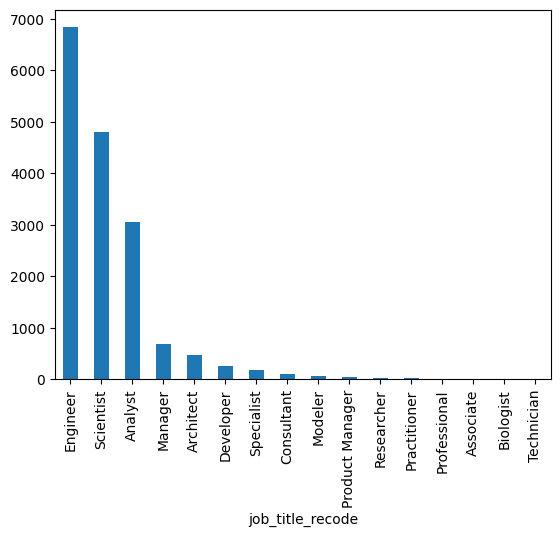

In [ ]:
df.job_title_recode.value_counts().plot.bar(legend=False)
plt.grid(False)
plt.xticks(rotation=90)
plt.show()

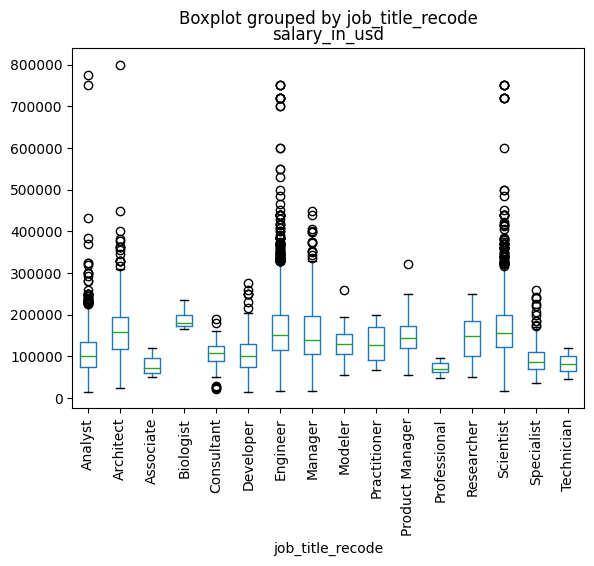

In [ ]:
df.boxplot(by='job_title_recode', column =['salary_in_usd'], grid = False)
plt.xticks(rotation=90)
plt.show()

## Salary currency

In [ ]:
df.salary_currency.unique()

array(['USD', 'EUR', 'SGD', 'ILS', 'GBP', 'INR', 'CAD', 'AUD', 'DKK',
       'BRL', 'TRY', 'HUF', 'PHP', 'PLN', 'NZD', 'CHF', 'MXN', 'JPY',
       'THB', 'NOK', 'HKD', 'CLP', 'ZAR'], dtype=object)

In [ ]:
df.salary_currency.unique().size

23

In [ ]:
df.salary_currency.value_counts()

salary_currency
USD    15294
GBP      616
EUR      449
CAD       56
INR       55
AUD       12
CHF        8
PLN        7
SGD        6
BRL        5
JPY        4
DKK        4
HUF        3
TRY        3
ILS        2
THB        2
NOK        2
PHP        1
NZD        1
MXN        1
HKD        1
CLP        1
ZAR        1
Name: count, dtype: int64

In [ ]:
df.salary_currency.value_counts()/16534*100

salary_currency
USD    92.500302
GBP     3.725656
EUR     2.715616
CAD     0.338696
INR     0.332648
AUD     0.072578
CHF     0.048385
PLN     0.042337
SGD     0.036289
BRL     0.030241
JPY     0.024193
DKK     0.024193
HUF     0.018144
TRY     0.018144
ILS     0.012096
THB     0.012096
NOK     0.012096
PHP     0.006048
NZD     0.006048
MXN     0.006048
HKD     0.006048
CLP     0.006048
ZAR     0.006048
Name: count, dtype: float64

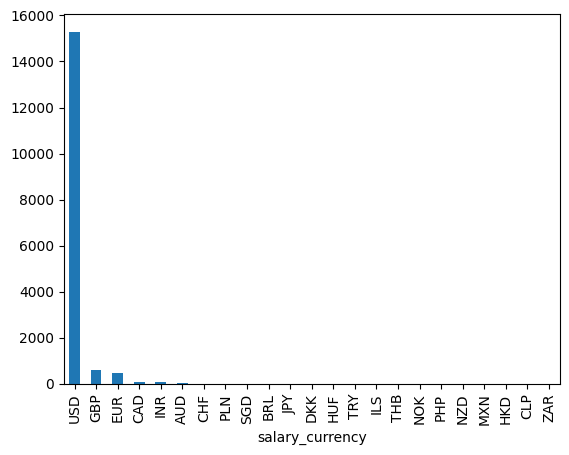

In [ ]:
df.salary_currency.value_counts().plot.bar()
plt.grid(False)
plt.xticks(rotation=90)
plt.show()

## Employee residence

In [ ]:
df.employee_residence.unique()

array(['US', 'ES', 'IN', 'DE', 'HR', 'CA', 'BE', 'FR', 'UA', 'IT', 'FI',
       'SE', 'BA', 'IL', 'GB', 'AE', 'OM', 'CZ', 'PT', 'RO', 'QA', 'KR',
       'PK', 'TN', 'SA', 'TR', 'AU', 'GH', 'CO', 'DK', 'EG', 'LT', 'HU',
       'NL', 'NG', 'BR', 'AR', 'KE', 'AT', 'BO', 'VN', 'PL', 'AS', 'MU',
       'PH', 'MX', 'MD', 'AM', 'LU', 'ZA', 'LV', 'SG', 'RU', 'GE', 'GR',
       'IE', 'SI', 'EE', 'CF', 'UZ', 'KW', 'CN', 'CR', 'ID', 'BG', 'NZ',
       'MT', 'CH', 'PE', 'PR', 'JP', 'HK', 'LB', 'TH', 'AD', 'EC', 'NO',
       'CY', 'DO', 'DZ', 'RS', 'CL', 'MY', 'IQ', 'UG', 'IR', 'HN', 'JE'],
      dtype=object)

In [ ]:
df.employee_residence.unique().size

88

In [ ]:
employee_residence = pd.DataFrame(df.employee_residence.value_counts().copy())

In [ ]:
top_employee_residence = employee_residence.head(20)

In [ ]:
top_employee_residence

count
employee_residence       
US                  14467
GB                    686
CA                    453
ES                    137
DE                     98
IN                     78
FR                     69
AU                     54
NL                     32
PT                     30
BR                     24
IT                     21
LT                     20
ZA                     19
GR                     17
CO                     16
LV                     16
PL                     15
EG                     14
MX                     14

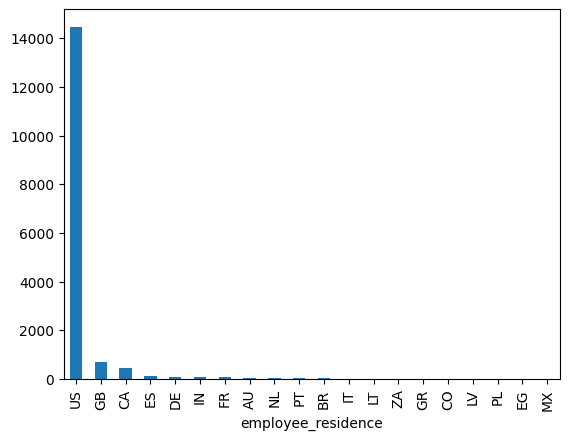

In [ ]:
top_employee_residence.plot.bar(legend=False)
plt.grid(False)
plt.xticks(rotation=90)
plt.show()

## Remote ratio

In [ ]:
df.remote_ratio.unique()

array([  0, 100,  50])

In [ ]:
df.remote_ratio.value_counts()

remote_ratio
0      11118
100     5167
50       249
Name: count, dtype: int64

In [ ]:
df.remote_ratio.value_counts()/16534*100

remote_ratio
0      67.243256
100    31.250756
50      1.505988
Name: count, dtype: float64

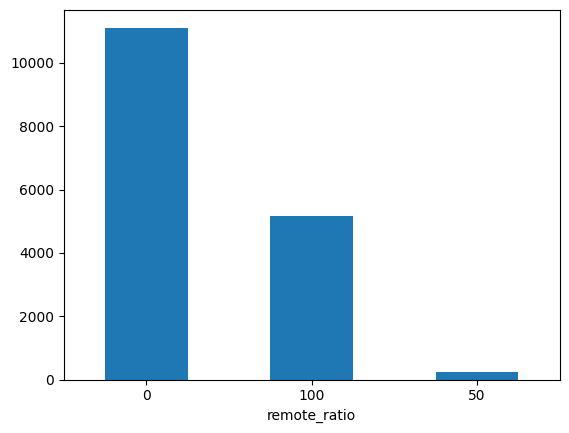

In [ ]:
df.remote_ratio.value_counts().plot.bar()
plt.grid(False)
plt.xticks(rotation=0)
plt.show()

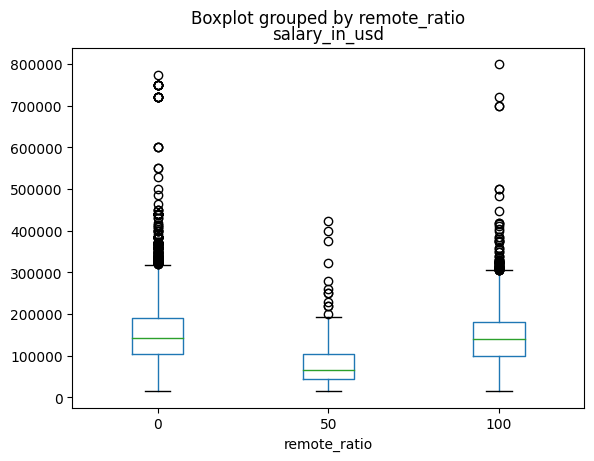

In [ ]:
df.boxplot(by='remote_ratio', column =['salary_in_usd'], grid = False)
plt.show()

## Company location

In [ ]:
df.company_location.unique()

array(['US', 'ES', 'IN', 'DE', 'CA', 'FR', 'UA', 'IT', 'FI', 'SE', 'BA',
       'IL', 'GB', 'AE', 'OM', 'PT', 'RO', 'QA', 'KR', 'AU', 'HU', 'CH',
       'SA', 'TR', 'GH', 'CO', 'DK', 'AS', 'EG', 'LT', 'NL', 'NG', 'BR',
       'KE', 'PK', 'AT', 'CZ', 'PL', 'BS', 'MU', 'PH', 'JP', 'MX', 'MD',
       'GI', 'RU', 'LU', 'ZA', 'LV', 'SG', 'IE', 'SI', 'EE', 'CF', 'HR',
       'AR', 'ID', 'GR', 'NZ', 'MT', 'PR', 'LB', 'TH', 'AD', 'EC', 'NO',
       'HK', 'BE', 'MY', 'DZ', 'CL', 'IQ', 'VN', 'AM', 'IR', 'HN', 'CN'],
      dtype=object)

In [ ]:
df.company_location.unique().size

77

In [ ]:
company_location = pd.DataFrame(df.company_location.value_counts().copy())

In [ ]:
top_company_location = company_location.head(20)

In [ ]:
top_company_location

count
company_location       
US                14518
GB                  694
CA                  455
ES                  133
DE                  105
FR                   65
IN                   63
AU                   57
NL                   32
PT                   28
BR                   22
LT                   20
ZA                   19
LV                   16
CO                   16
MX                   15
PL                   14
IT                   14
GR                   14
EG                   13

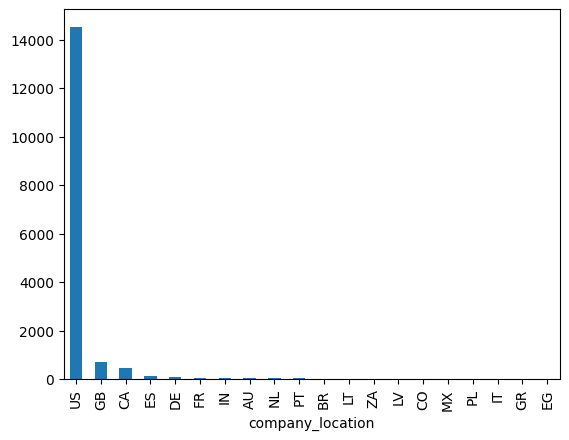

In [ ]:
top_company_location.plot.bar(legend=False)
plt.grid(False)
plt.xticks(rotation=90)
plt.show()

## Company size

In [ ]:
df.company_size.unique()

array(['M', 'L', 'S'], dtype=object)

In [ ]:
df.company_size.value_counts()

company_size
M    15306
L     1040
S      188
Name: count, dtype: int64

In [ ]:
df.company_size.value_counts()/16534*100

company_size
M    92.572880
L     6.290069
S     1.137051
Name: count, dtype: float64

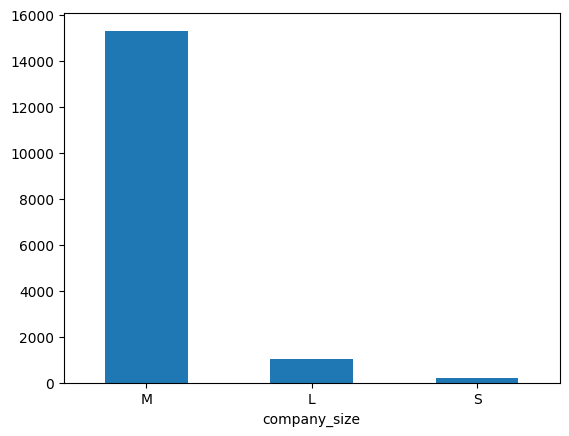

In [ ]:
df.company_size.value_counts().plot.bar()
plt.grid(False)
plt.xticks(rotation=0)
plt.show()

# Explore the Outliers

In [ ]:
median = df.salary_in_usd.median()

In [ ]:
median

141300.0

In [ ]:
mad = stats.median_abs_deviation(df.salary_in_usd)

In [ ]:
mad

41300.0

In [ ]:
z_alpha = 1

##High outliers

In [ ]:
higher = median + z_alpha*mad

In [ ]:
higher

182600.0

In [ ]:
high_outlier = df[df.salary_in_usd > higher].copy()

In [ ]:
high_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4477 entries, 5 to 16533
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           4477 non-null   int64 
 1   experience_level    4477 non-null   object
 2   employment_type     4477 non-null   object
 3   job_title           4477 non-null   object
 4   job_title_recode    4477 non-null   object
 5   salary              4477 non-null   int64 
 6   salary_currency     4477 non-null   object
 7   salary_in_usd       4477 non-null   int64 
 8   employee_residence  4477 non-null   object
 9   remote_ratio        4477 non-null   int64 
 10  company_location    4477 non-null   object
 11  company_size        4477 non-null   object
dtypes: int64(4), object(8)
memory usage: 454.7+ KB


### Salary in USD

In [ ]:
high_outlier.salary_in_usd.describe()

count      4477.000000
mean     234805.347778
std       58461.232928
min      182750.000000
25%      200000.000000
50%      220000.000000
75%      250500.000000
max      800000.000000
Name: salary_in_usd, dtype: float64

In [ ]:
bins = np.arange(200000, 825000, 25000)
high_outlier.salary_in_usd.hist(bins=bins)
plt.grid(False)
plt.show()

In [ ]:
df[df.salary_in_usd > 450000].copy()

work_year experience_level employment_type                   job_title  \
9           2024               MI              FT                AI Architect   
225         2024               SE              FT          Analytics Engineer   
229         2024               SE              FT          Analytics Engineer   
309         2024               MI              FT          Analytics Engineer   
323         2024               SE              FT          Analytics Engineer   
339         2024               SE              FT          Analytics Engineer   
387         2023               SE              FT          Analytics Engineer   
403         2023               MI              FT          Analytics Engineer   
2555        2024               EN              FT                Data Analyst   
2755        2024               SE              FT                Data Analyst   
6283        2023               EX              FT               Data Engineer   
6365        2023               MI              FT               Data Engineer   
9996        2024               SE              FT              Data Scientist   
10387       2024               SE              FT              Data Scientist   
10995       2023               SE              FT              Data Scientist   
13491       2024               SE              FT   Machine Learning Engineer   
13493       2024               SE              FT   Machine Learning Engineer   
13957       2023               MI              FT   Machine Learning Engineer   
15117       2024               MI              FT  Machine Learning Scientist   
15139       2024               MI              FT  Machine Learning Scientist   
15149       2024               MI              FT  Machine Learning Scientist   
15153       2023               MI              FT  Machine Learning Scientist   
15306       2024               MI              FT                 ML Engineer   
15530       2024               SE              FT             Prompt Engineer   
15681       2024               SE              FT           Research Engineer   
15733       2024               SE              FT           Research Engineer   
15794       2024               MI              FT           Research Engineer   
15796       2024               MI              FT           Research Engineer   
16065       2024               SE              FT          Research Scientist   
16067       2024               SE              FT          Research Scientist   
16113       2024               SE              FT          Research Scientist   
16117       2024               SE              FT          Research Scientist   
16183       2024               MI              FT          Research Scientist   

      job_title_recode  salary salary_currency  salary_in_usd  \
9            Architect  800000             USD         800000   
225           Engineer  720000             USD         720000   
229           Engineer  500000             USD         500000   
309           Engineer  720000             USD         720000   
323           Engineer  720000             USD         720000   
339           Engineer  750000             USD         750000   
387           Engineer  700000             USD         700000   
403           Engineer  700000             USD         700000   
2555           Analyst  774000             USD         774000   
2755           Analyst  750000             USD         750000   
6283          Engineer  465000             USD         465000   
6365          Engineer  750000             USD         750000   
9996         Scientist  720000             USD         720000   
10387        Scientist  720000             USD         720000   
10995        Scientist  750000             USD         750000   
13491         Engineer  550000             USD         550000   
13493         Engineer  550000             USD         550000   
13957         Engineer  750000             USD         750000   
15117        Scie

In [ ]:
count = 2057

### Work year

In [ ]:
high_outlier.work_year.unique()

array([2024, 2023, 2022, 2021, 2020])

In [ ]:
high_outlier.work_year.value_counts()

work_year
2023    2504
2024    1598
2022     341
2021      25
2020       9
Name: count, dtype: int64

In [ ]:
high_outlier.work_year.value_counts()/count*100

work_year
2023    121.730676
2024     77.685950
2022     16.577540
2021      1.215362
2020      0.437530
Name: count, dtype: float64

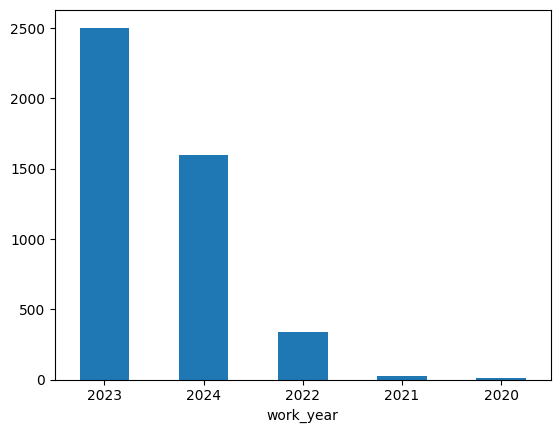

In [ ]:
high_outlier.work_year.value_counts().plot.bar()
plt.grid(False)
plt.xticks(rotation=0)
plt.show()

### Experience level

In [ ]:
high_outlier.experience_level.unique()

array(['SE', 'MI', 'EX', 'EN'], dtype=object)

In [ ]:
high_outlier.experience_level.value_counts()

experience_level
SE    3578
MI     565
EX     271
EN      63
Name: count, dtype: int64

In [ ]:
high_outlier.experience_level.value_counts()/count*100

experience_level
SE    173.942635
MI     27.467185
EX     13.174526
EN      3.062713
Name: count, dtype: float64

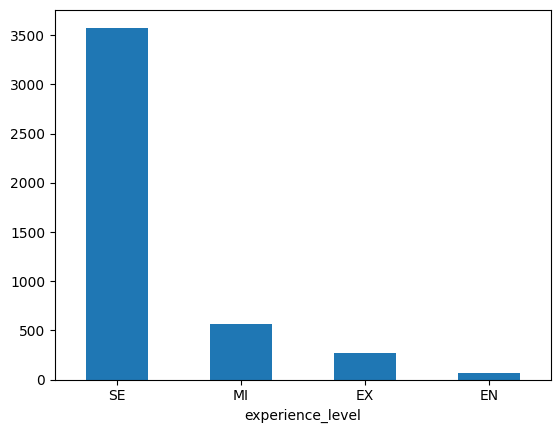

In [ ]:
high_outlier.experience_level.value_counts().plot.bar()
plt.grid(False)
plt.xticks(rotation=0)
plt.show()

### Employment type

In [ ]:
high_outlier.employment_type.unique()

array(['FT', 'PT', 'CT'], dtype=object)

In [ ]:
high_outlier.employment_type.value_counts()

employment_type
FT    4470
CT       4
PT       3
Name: count, dtype: int64

In [ ]:
high_outlier.employment_type.value_counts()/count*100

employment_type
FT    217.306757
CT      0.194458
PT      0.145843
Name: count, dtype: float64

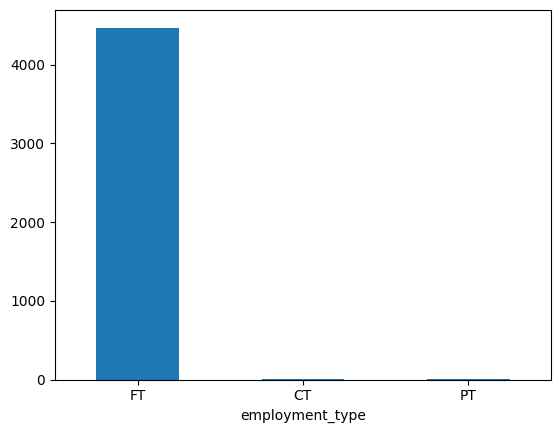

In [ ]:
high_outlier.employment_type.value_counts().plot.bar()
plt.grid(False)
plt.xticks(rotation=0)
plt.show()

### Job Title

In [ ]:
high_outlier.job_title.unique()

array(['AI Architect', 'AI Developer', 'AI Engineer',
       'AI Product Manager', 'AI Research Engineer', 'AI Scientist',
       'AI Software Engineer', 'Analytics Engineer',
       'Analytics Engineering Manager', 'Applied Data Scientist',
       'Applied Machine Learning Engineer',
       'Applied Machine Learning Scientist', 'Applied Scientist',
       'AWS Data Architect', 'Bear Robotics', 'BI Analyst',
       'BI Developer', 'Business Intelligence',
       'Business Intelligence Analyst', 'Business Intelligence Engineer',
       'Business Intelligence Lead', 'Business Intelligence Manager',
       'Business Intelligence Specialist', 'Cloud Data Architect',
       'Cloud Database Engineer', 'Computational Biologist',
       'Computer Vision Engineer', 'Data Analyst', 'Data Analytics Lead',
       'Data Analytics Manager', 'Data Architect', 'Data Engineer',
       'Data Infrastructure Engineer', 'Data Integration Specialist',
       'Data Lead', 'Data Management Analyst',
       'D

In [ ]:
high_outlier.job_title.unique().size

93

In [ ]:
job_title = pd.DataFrame(high_outlier.job_title.value_counts().copy())

In [ ]:
top_job_title = job_title.head(20)

In [ ]:
top_job_title

count
job_title                            
Data Scientist                    961
Machine Learning Engineer         870
Data Engineer                     815
Research Scientist                256
Applied Scientist                 241
Research Engineer                 132
Data Architect                    132
Data Analyst                      113
Analytics Engineer                108
ML Engineer                       106
Data Science                       94
Business Intelligence Engineer     80
Data Science Manager               65
Machine Learning Scientist         54
Head of Data                       43
AI Engineer                        41
Director of Data Science           23
AI Architect                       21
Computer Vision Engineer           19
Business Intelligence Analyst      18

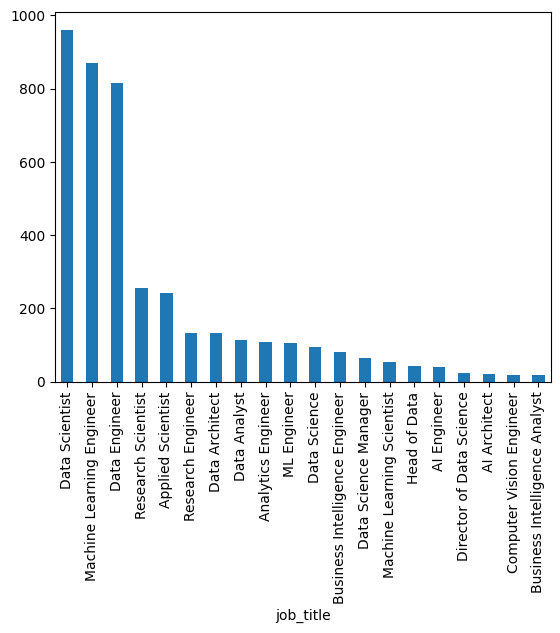

In [ ]:
top_job_title.plot.bar(legend=False)
plt.grid(False)
plt.xticks(rotation=90)
plt.show()

### Recoded Job title

In [ ]:
high_outlier.job_title_recode.unique()

array(['Architect', 'Developer', 'Engineer', 'Product Manager',
       'Scientist', 'Manager', 'Analyst', 'Specialist', 'Biologist',
       'Modeler', 'Consultant', 'Practitioner', 'Researcher'],
      dtype=object)

In [ ]:
high_outlier.job_title_recode.value_counts()

job_title_recode
Engineer           2261
Scientist          1635
Manager             205
Analyst             172
Architect           155
Developer            13
Product Manager      11
Specialist           10
Researcher            6
Modeler               3
Practitioner          3
Biologist             2
Consultant            1
Name: count, dtype: int64

In [ ]:
high_outlier.job_title_recode.value_counts()/count*100

job_title_recode
Engineer           109.917355
Scientist           79.484686
Manager              9.965970
Analyst              8.361692
Architect            7.535246
Developer            0.631988
Product Manager      0.534759
Specialist           0.486145
Researcher           0.291687
Modeler              0.145843
Practitioner         0.145843
Biologist            0.097229
Consultant           0.048614
Name: count, dtype: float64

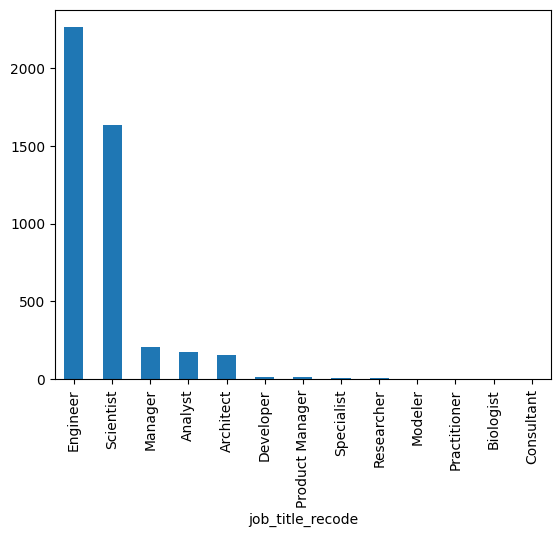

In [ ]:
high_outlier.job_title_recode.value_counts().plot.bar(legend=False)
plt.grid(False)
plt.xticks(rotation=90)
plt.show()

### Salary currency

In [ ]:
high_outlier.salary_currency.unique()

array(['USD', 'EUR', 'GBP', 'ILS', 'CAD', 'CHF'], dtype=object)

In [ ]:
high_outlier.salary_currency.value_counts()

salary_currency
USD    4448
GBP      16
CAD       7
EUR       4
ILS       1
CHF       1
Name: count, dtype: int64

In [ ]:
high_outlier.salary_currency.value_counts()/count*100

salary_currency
USD    216.237239
GBP      0.777832
CAD      0.340301
EUR      0.194458
ILS      0.048614
CHF      0.048614
Name: count, dtype: float64

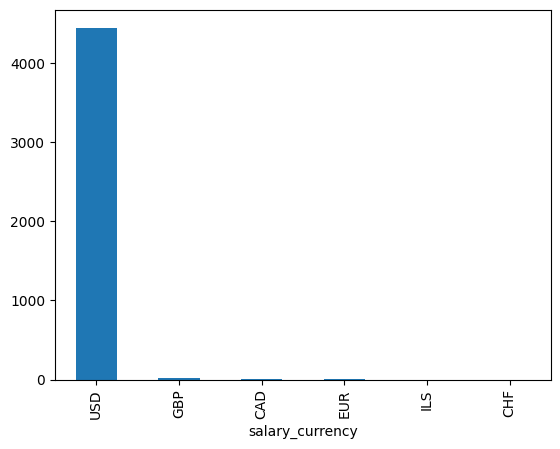

In [ ]:
high_outlier.salary_currency.value_counts().plot.bar()
plt.grid(False)
plt.xticks(rotation=90)
plt.show()

### Employee residence

In [ ]:
high_outlier.employee_residence.unique()

array(['US', 'CA', 'BE', 'DE', 'GB', 'QA', 'IL', 'IN', 'EG', 'FR', 'PL',
       'NG', 'MX', 'AU', 'ES', 'PR', 'CH', 'NZ', 'MY', 'RU', 'UA', 'JP'],
      dtype=object)

In [ ]:
high_outlier.employee_residence.value_counts()

employee_residence
US    4258
CA     115
GB      48
AU      13
DE       9
FR       8
EG       5
MX       3
ES       3
PR       2
UA       2
RU       1
MY       1
NZ       1
CH       1
NG       1
PL       1
IN       1
IL       1
QA       1
BE       1
JP       1
Name: count, dtype: int64

In [ ]:
high_outlier.employee_residence.value_counts()/count*100

employee_residence
US    207.000486
CA      5.590666
GB      2.333495
AU      0.631988
DE      0.437530
FR      0.388916
EG      0.243072
MX      0.145843
ES      0.145843
PR      0.097229
UA      0.097229
RU      0.048614
MY      0.048614
NZ      0.048614
CH      0.048614
NG      0.048614
PL      0.048614
IN      0.048614
IL      0.048614
QA      0.048614
BE      0.048614
JP      0.048614
Name: count, dtype: float64

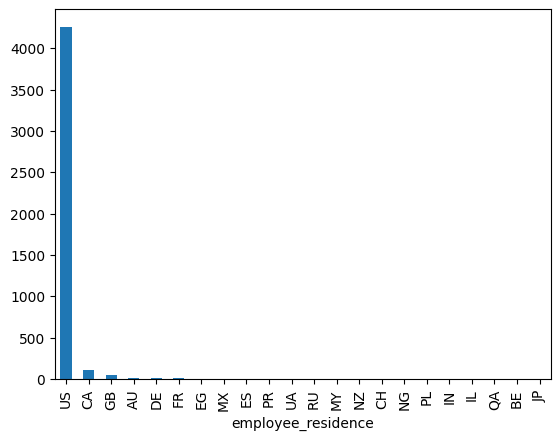

In [ ]:
high_outlier.employee_residence.value_counts().plot.bar(legend=False)
plt.grid(False)
plt.xticks(rotation=90)
plt.show()

### Remote ratio

In [ ]:
high_outlier.remote_ratio.unique()

array([  0, 100,  50])

In [ ]:
high_outlier.remote_ratio.value_counts()

remote_ratio
0      3177
100    1285
50       15
Name: count, dtype: int64

In [ ]:
high_outlier.remote_ratio.value_counts()/count*100

remote_ratio
0      154.448226
100     62.469616
50       0.729217
Name: count, dtype: float64

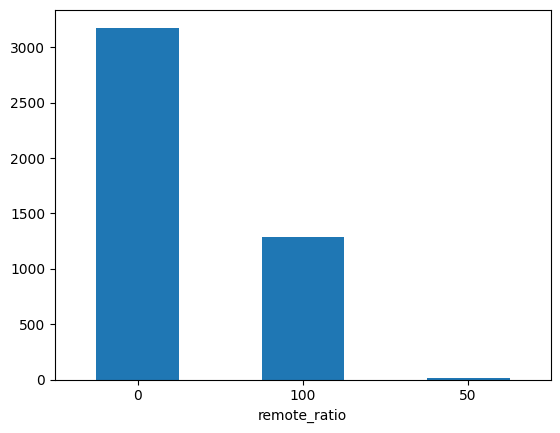

In [ ]:
high_outlier.remote_ratio.value_counts().plot.bar()
plt.grid(False)
plt.xticks(rotation=0)
plt.show()

### Company location

In [ ]:
high_outlier.company_location.unique()

array(['US', 'CA', 'DE', 'GB', 'QA', 'IL', 'EG', 'FR', 'PL', 'NG', 'MX',
       'AU', 'PR', 'CH', 'NZ', 'RU', 'UA', 'JP', 'ES'], dtype=object)

In [ ]:
high_outlier.company_location.value_counts()

company_location
US    4262
CA     116
GB      48
AU      13
DE       9
FR       7
EG       5
MX       3
UA       2
PR       2
ES       2
PL       1
IL       1
CH       1
NZ       1
RU       1
QA       1
JP       1
NG       1
Name: count, dtype: int64

In [ ]:
high_outlier.company_location.value_counts()/count*100

company_location
US    207.194944
CA      5.639281
GB      2.333495
AU      0.631988
DE      0.437530
FR      0.340301
EG      0.243072
MX      0.145843
UA      0.097229
PR      0.097229
ES      0.097229
PL      0.048614
IL      0.048614
CH      0.048614
NZ      0.048614
RU      0.048614
QA      0.048614
JP      0.048614
NG      0.048614
Name: count, dtype: float64

In [ ]:
high_outlier.company_location.value_counts().plot.bar(legend=False)
plt.grid(False)
plt.xticks(rotation=90)
plt.show()

### Company size

In [ ]:
high_outlier.company_size.unique()

array(['M', 'L', 'S'], dtype=object)

In [ ]:
high_outlier.company_size.value_counts()

company_size
M    4139
L     325
S      13
Name: count, dtype: int64

In [ ]:
high_outlier.company_size.value_counts()/count*100

company_size
M    201.215362
L     15.799708
S      0.631988
Name: count, dtype: float64

In [ ]:
high_outlier.company_size.value_counts().plot.bar()
plt.grid(False)
plt.xticks(rotation=0)
plt.show()

##Low outliers

In [ ]:
lower = median - z_alpha*mad

In [ ]:
lower

100000.0

In [ ]:
low_outlier = df[df.salary_in_usd < lower].copy()

In [ ]:
low_outlier.head()

work_year experience_level employment_type             job_title  \
0        2024               MI              FT  Admin & Data Analyst   
1        2024               MI              FT  Admin & Data Analyst   
2        2022               SE              FT  Admin & Data Analyst   
3        2023               EN              FT  Admin & Data Analyst   
12       2024               SE              FT          AI Architect   

   job_title_recode  salary salary_currency  salary_in_usd employee_residence  \
0           Analyst   95000             USD          95000                 US   
1           Analyst   38000             EUR          42222                 ES   
2           Analyst   60000             USD          60000                 IN   
3           Analyst   50000             USD          50000                 DE   
12        Architect   99750             USD          99750                 US   

    remote_ratio company_location company_size  
0              0               US            M  
1            100               ES            L  
2            100               IN            M  
3              0               DE            M  
12           100               US            M

In [ ]:
low_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3775 entries, 0 to 16530
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3775 non-null   int64 
 1   experience_level    3775 non-null   object
 2   employment_type     3775 non-null   object
 3   job_title           3775 non-null   object
 4   job_title_recode    3775 non-null   object
 5   salary              3775 non-null   int64 
 6   salary_currency     3775 non-null   object
 7   salary_in_usd       3775 non-null   int64 
 8   employee_residence  3775 non-null   object
 9   remote_ratio        3775 non-null   int64 
 10  company_location    3775 non-null   object
 11  company_size        3775 non-null   object
dtypes: int64(4), object(8)
memory usage: 383.4+ KB


### Salary in USD

In [ ]:
low_outlier.salary_in_usd.describe()

count     3775.000000
mean     71420.667285
std      19259.958984
min      15000.000000
25%      59151.000000
50%      75000.000000
75%      86900.000000
max      99900.000000
Name: salary_in_usd, dtype: float64

In [ ]:
bins = np.arange(15000, 62500, 2500)
low_outlier.salary_in_usd.hist(bins=bins)
plt.grid(False)
plt.show()

In [ ]:
count = 935

### Work year

In [ ]:
low_outlier.work_year.unique()

array([2024, 2022, 2023, 2021, 2020])

In [ ]:
low_outlier.work_year.value_counts()

work_year
2023    1676
2024    1478
2022     446
2021     131
2020      44
Name: count, dtype: int64

In [ ]:
low_outlier.work_year.value_counts()/count*100

work_year
2023    179.251337
2024    158.074866
2022     47.700535
2021     14.010695
2020      4.705882
Name: count, dtype: float64

In [ ]:
low_outlier.work_year.value_counts().plot.bar()
plt.grid(False)
plt.xticks(rotation=0)
plt.show()

### Experience level

In [ ]:
low_outlier.experience_level.unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [ ]:
low_outlier.experience_level.value_counts()

experience_level
MI    1496
SE    1395
EN     852
EX      32
Name: count, dtype: int64

In [ ]:
low_outlier.experience_level.value_counts()/count*100

experience_level
MI    160.000000
SE    149.197861
EN     91.122995
EX      3.422460
Name: count, dtype: float64

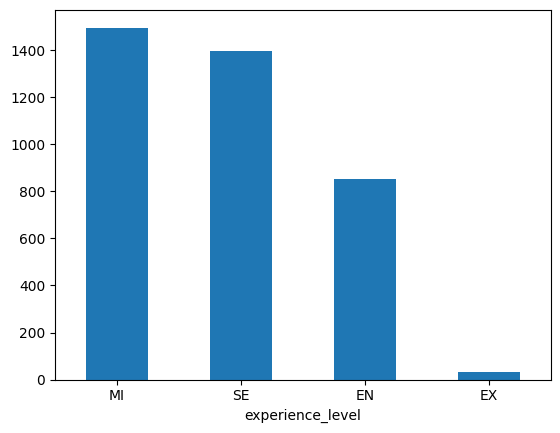

In [ ]:
low_outlier.experience_level.value_counts().plot.bar()
plt.grid(False)
plt.xticks(rotation=0)
plt.show()

### Employment type

In [ ]:
low_outlier.employment_type.unique()

array(['FT', 'CT', 'FL', 'PT'], dtype=object)

In [ ]:
low_outlier.employment_type.value_counts()

employment_type
FT    3723
PT      25
CT      15
FL      12
Name: count, dtype: int64

In [ ]:
low_outlier.employment_type.value_counts()/count*100

employment_type
FT    398.181818
PT      2.673797
CT      1.604278
FL      1.283422
Name: count, dtype: float64

In [ ]:
low_outlier.employment_type.value_counts().plot.bar()
plt.grid(False)
plt.xticks(rotation=0)
plt.show()

### Job Title

In [ ]:
low_outlier.job_title.unique()

array(['Admin & Data Analyst', 'AI Architect', 'AI Developer',
       'AI Engineer', 'AI Product Manager', 'AI Programmer',
       'AI Research Engineer', 'AI Research Scientist', 'AI Scientist',
       'Analytics Engineer', 'Applied Data Scientist',
       'Applied Machine Learning Engineer',
       'Applied Machine Learning Scientist', 'Applied Research Scientist',
       'Applied Scientist', 'Autonomous Vehicle Technician', 'BI Analyst',
       'BI Data Analyst', 'BI Data Engineer', 'BI Developer',
       'Big Data Architect', 'Big Data Engineer', 'Business Data Analyst',
       'Business Intelligence', 'Business Intelligence Analyst',
       'Business Intelligence Data Analyst',
       'Business Intelligence Developer',
       'Business Intelligence Engineer', 'Business Intelligence Manager',
       'Business Intelligence Specialist', 'Cloud Data Engineer',
       'Cloud Database Engineer', 'Compliance Data Analyst',
       'Computer Vision Engineer', 'Computer Vision Software Engi

In [ ]:
low_outlier.job_title.unique().size

130

In [ ]:
job_title = pd.DataFrame(low_outlier.job_title.value_counts().copy())

In [ ]:
top_job_title = job_title.head(20)

In [ ]:
top_job_title

count
job_title                             
Data Analyst                      1110
Data Engineer                      699
Data Scientist                     574
Machine Learning Engineer          122
Data Manager                        87
Business Intelligence Analyst       80
Business Intelligence Engineer      68
Analytics Engineer                  61
Research Analyst                    61
Data Science                        59
Data Specialist                     59
Data Architect                      51
Research Scientist                  40
BI Developer                        38
Research Engineer                   37
AI Engineer                         33
Data Science Consultant             32
Business Intelligence Developer     30
ML Engineer                         20
Data Quality Analyst                19

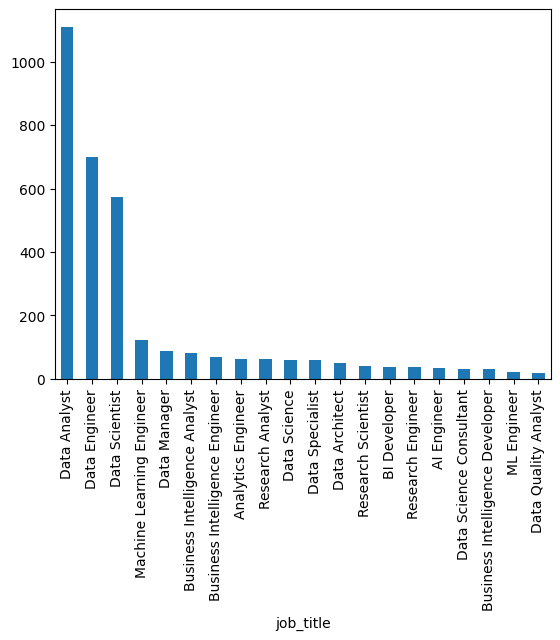

In [ ]:
top_job_title.plot.bar(legend=False)
plt.grid(False)
plt.xticks(rotation=90)
plt.show()

### Recoded Job title

In [ ]:
low_outlier.job_title_recode.unique()

array(['Analyst', 'Architect', 'Developer', 'Engineer', 'Product Manager',
       'Scientist', 'Technician', 'Manager', 'Specialist', 'Associate',
       'Consultant', 'Modeler', 'Practitioner', 'Professional',
       'Researcher'], dtype=object)

In [ ]:
low_outlier.job_title_recode.value_counts()

job_title_recode
Analyst            1403
Engineer           1129
Scientist           721
Manager             151
Specialist          121
Developer           117
Architect            54
Consultant           38
Modeler              11
Professional          8
Product Manager       7
Practitioner          6
Associate             5
Researcher            3
Technician            1
Name: count, dtype: int64

In [ ]:
low_outlier.job_title_recode.value_counts()/count*100

job_title_recode
Analyst            150.053476
Engineer           120.748663
Scientist           77.112299
Manager             16.149733
Specialist          12.941176
Developer           12.513369
Architect            5.775401
Consultant           4.064171
Modeler              1.176471
Professional         0.855615
Product Manager      0.748663
Practitioner         0.641711
Associate            0.534759
Researcher           0.320856
Technician           0.106952
Name: count, dtype: float64

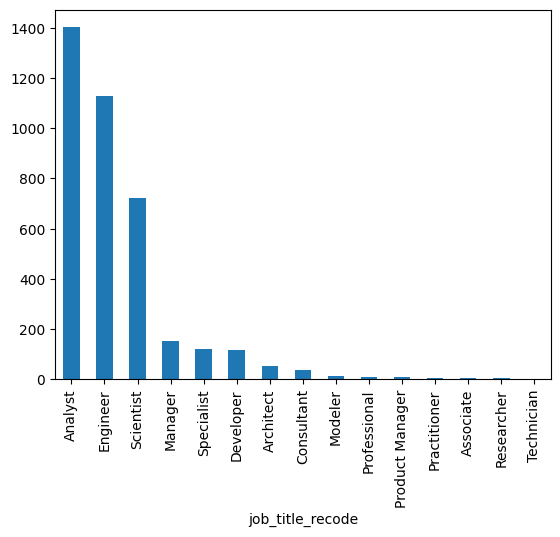

In [ ]:
low_outlier.job_title_recode.value_counts().plot.bar(legend=False)
plt.grid(False)
plt.xticks(rotation=90)
plt.show()

### Salary currency

In [ ]:
low_outlier.salary_currency.unique()

array(['USD', 'EUR', 'SGD', 'GBP', 'INR', 'CAD', 'AUD', 'DKK', 'BRL',
       'TRY', 'HUF', 'PHP', 'PLN', 'MXN', 'JPY', 'THB', 'NOK', 'HKD',
       'CLP', 'CHF', 'ZAR'], dtype=object)

In [ ]:
low_outlier.salary_currency.value_counts()

salary_currency
USD    2749
GBP     489
EUR     405
INR      55
CAD      28
AUD      10
PLN       7
SGD       5
BRL       5
JPY       4
HUF       3
TRY       3
DKK       3
THB       2
PHP       1
MXN       1
NOK       1
HKD       1
CLP       1
CHF       1
ZAR       1
Name: count, dtype: int64

In [ ]:
low_outlier.salary_currency.value_counts()/count*100

salary_currency
USD    294.010695
GBP     52.299465
EUR     43.315508
INR      5.882353
CAD      2.994652
AUD      1.069519
PLN      0.748663
SGD      0.534759
BRL      0.534759
JPY      0.427807
HUF      0.320856
TRY      0.320856
DKK      0.320856
THB      0.213904
PHP      0.106952
MXN      0.106952
NOK      0.106952
HKD      0.106952
CLP      0.106952
CHF      0.106952
ZAR      0.106952
Name: count, dtype: float64

In [ ]:
low_outlier.salary_currency.value_counts().plot.bar()
plt.grid(False)
plt.xticks(rotation=90)
plt.show()

### Employee residence

In [ ]:
low_outlier.employee_residence.unique()

array(['US', 'ES', 'IN', 'DE', 'FR', 'UA', 'IT', 'FI', 'SE', 'GB', 'AE',
       'OM', 'CZ', 'PT', 'RO', 'HR', 'BA', 'KR', 'CA', 'PK', 'TR', 'AU',
       'GH', 'DK', 'LT', 'HU', 'NL', 'NG', 'BR', 'AR', 'KE', 'AT', 'BO',
       'TN', 'VN', 'AS', 'EG', 'PH', 'MX', 'MD', 'AM', 'LU', 'ZA', 'LV',
       'SG', 'RU', 'GE', 'GR', 'IE', 'PL', 'SI', 'EE', 'CO', 'CF', 'KW',
       'CR', 'ID', 'BG', 'BE', 'MT', 'PE', 'JP', 'HK', 'LB', 'TH', 'AD',
       'EC', 'NO', 'UZ', 'CY', 'RS', 'CL', 'UG', 'CH', 'SA', 'HN'],
      dtype=object)

In [ ]:
low_outlier.employee_residence.unique().size

76

In [ ]:
employee_residence = pd.DataFrame(low_outlier.employee_residence.value_counts().copy())

In [ ]:
top_employee_residence = employee_residence.head(20)

In [ ]:
top_employee_residence

count
employee_residence       
US                   2477
GB                    457
ES                    128
CA                    108
IN                     73
DE                     65
FR                     52
PT                     28
NL                     26
AU                     25
BR                     20
IT                     20
ZA                     18
GR                     17
LT                     17
LV                     16
AR                     13
CO                     13
AT                     12
EE                     11

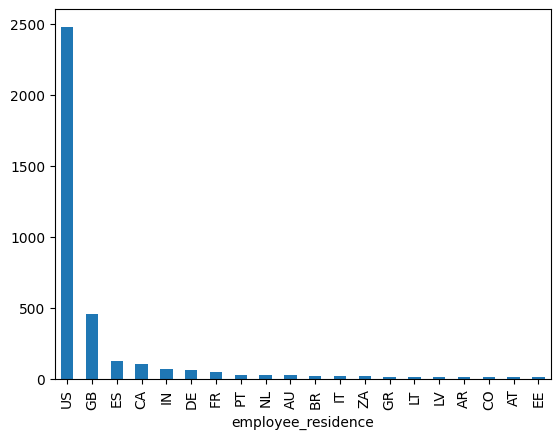

In [ ]:
top_employee_residence.plot.bar(legend=False)
plt.grid(False)
plt.xticks(rotation=90)
plt.show()

### Remote ratio

In [ ]:
low_outlier.remote_ratio.unique()

array([  0, 100,  50])

In [ ]:
low_outlier.remote_ratio.value_counts()

remote_ratio
0      2408
100    1189
50      178
Name: count, dtype: int64

In [ ]:
low_outlier.remote_ratio.value_counts()/count*100

remote_ratio
0      257.540107
100    127.165775
50      19.037433
Name: count, dtype: float64

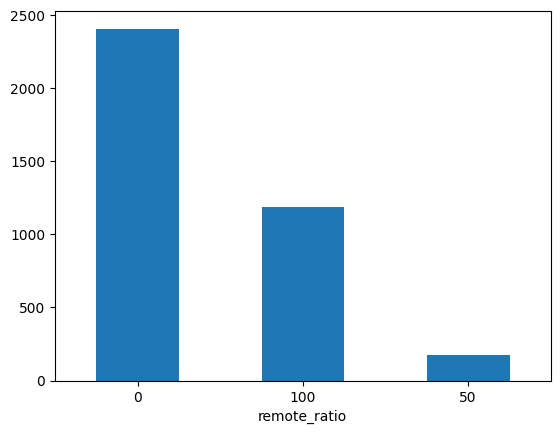

In [ ]:
low_outlier.remote_ratio.value_counts().plot.bar()
plt.grid(False)
plt.xticks(rotation=0)
plt.show()

### Company location

In [ ]:
low_outlier.company_location.unique()

array(['US', 'ES', 'IN', 'DE', 'FR', 'UA', 'IT', 'FI', 'SE', 'GB', 'AE',
       'OM', 'CA', 'PT', 'RO', 'BA', 'KR', 'AU', 'HU', 'CH', 'TR', 'GH',
       'DK', 'AS', 'LT', 'NL', 'NG', 'BR', 'KE', 'PK', 'AT', 'CZ', 'BS',
       'PH', 'MX', 'MD', 'GI', 'RU', 'LU', 'ZA', 'LV', 'SG', 'IE', 'PL',
       'SI', 'EE', 'CO', 'CF', 'HR', 'AR', 'ID', 'GR', 'MT', 'JP', 'LB',
       'TH', 'EG', 'AD', 'EC', 'NO', 'HK', 'BE', 'MY', 'CL', 'VN', 'AM',
       'SA', 'HN'], dtype=object)

In [ ]:
low_outlier.company_location.unique().size

68

In [ ]:
company_location = pd.DataFrame(low_outlier.company_location.value_counts().copy())

In [ ]:
top_company_location = company_location.head(20)

In [ ]:
top_company_location

count
company_location       
US                 2512
GB                  464
ES                  126
CA                  111
DE                   74
IN                   60
FR                   46
AU                   27
PT                   27
NL                   26
BR                   20
ZA                   18
LT                   17
LV                   16
IT                   14
GR                   14
CO                   13
EE                   12
AT                   12
MX                   11

In [ ]:
top_company_location.plot.bar(legend=False)
plt.grid(False)
plt.xticks(rotation=90)
plt.show()

### Company size

In [ ]:
low_outlier.company_size.unique()

array(['M', 'L', 'S'], dtype=object)

In [ ]:
low_outlier.company_size.value_counts()

company_size
M    3337
L     317
S     121
Name: count, dtype: int64

In [ ]:
low_outlier.company_size.value_counts()/count*100

company_size
M    356.898396
L     33.903743
S     12.941176
Name: count, dtype: float64

In [ ]:
low_outlier.company_size.value_counts().plot.bar()
plt.grid(False)
plt.xticks(rotation=0)
plt.show()

# Exclude the Outliers

In [ ]:
df_clean = df[(df.salary_in_usd <= higher) & (df.salary_in_usd >= lower)].copy()

In [ ]:
df_clean.head()

work_year experience_level employment_type     job_title job_title_recode  \
4        2022               SE              FT  AI Architect        Architect   
6        2024               SE              FT  AI Architect        Architect   
8        2024               SE              FT  AI Architect        Architect   
14       2024               SE              FT  AI Architect        Architect   
16       2024               SE              FT  AI Architect        Architect   

    salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
4   180000             USD         180000                 HR           100   
6   153400             USD         153400                 US             0   
8   173000             USD         173000                 US             0   
14  132500             USD         132500                 US             0   
16  177000             USD         177000                 US             0   

   company_location company_size  
4                US            M  
6                US            M  
8                US            M  
14               US            M  
16               US            M

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8282 entries, 4 to 16532
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           8282 non-null   int64 
 1   experience_level    8282 non-null   object
 2   employment_type     8282 non-null   object
 3   job_title           8282 non-null   object
 4   job_title_recode    8282 non-null   object
 5   salary              8282 non-null   int64 
 6   salary_currency     8282 non-null   object
 7   salary_in_usd       8282 non-null   int64 
 8   employee_residence  8282 non-null   object
 9   remote_ratio        8282 non-null   int64 
 10  company_location    8282 non-null   object
 11  company_size        8282 non-null   object
dtypes: int64(4), object(8)
memory usage: 841.1+ KB


## Salary in USD

In [ ]:
df_clean.salary_in_usd.describe()

count      8282.000000
mean     139348.542140
std       23169.437281
min      100000.000000
25%      120000.000000
50%      139763.500000
75%      159300.000000
max      182600.000000
Name: salary_in_usd, dtype: float64

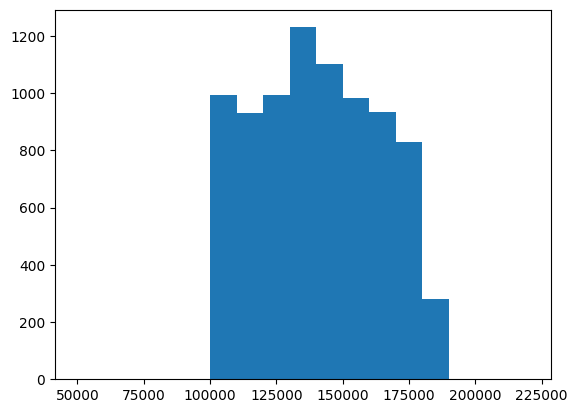

In [ ]:
bins = np.arange(50000, 230000, 10000)
df_clean.salary_in_usd.hist(bins=bins)
plt.grid(False)
plt.show()

In [ ]:
count = 13542

## Work year

In [ ]:
df_clean.work_year.unique()

array([2022, 2024, 2023, 2021, 2020])

In [ ]:
df_clean.work_year.value_counts()

work_year
2023    4339
2024    2991
2022     868
2021      62
2020      22
Name: count, dtype: int64

In [ ]:
df_clean.work_year.value_counts()/count*100

work_year
2023    32.041057
2024    22.086841
2022     6.409688
2021     0.457835
2020     0.162458
Name: count, dtype: float64

In [ ]:
df_clean.work_year.value_counts().plot.bar()
plt.grid(False)
plt.xticks(rotation=0)
plt.show()

## Experience level

In [ ]:
df_clean.experience_level.unique()

array(['SE', 'EN', 'MI', 'EX'], dtype=object)

In [ ]:
df_clean.experience_level.value_counts()

experience_level
SE    5697
MI    1977
EN     410
EX     198
Name: count, dtype: int64

In [ ]:
df_clean.experience_level.value_counts()/count*100

experience_level
SE    42.069118
MI    14.599025
EN     3.027618
EX     1.462118
Name: count, dtype: float64

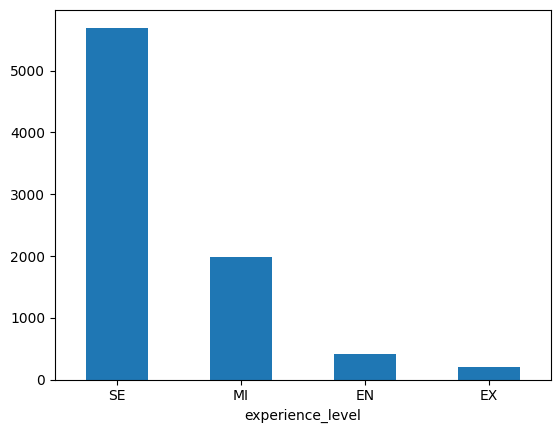

In [ ]:
df_clean.experience_level.value_counts().plot.bar()
plt.grid(False)
plt.xticks(rotation=0)
plt.show()

## Employment type

In [ ]:
df_clean.employment_type.unique()

array(['FT', 'PT', 'CT', 'FL'], dtype=object)

In [ ]:
df_clean.employment_type.value_counts()

employment_type
FT    8261
PT      10
CT       9
FL       2
Name: count, dtype: int64

In [ ]:
df_clean.employment_type.value_counts()/count*100

employment_type
FT    61.002806
PT     0.073844
CT     0.066460
FL     0.014769
Name: count, dtype: float64

In [ ]:
df_clean.employment_type.value_counts().plot.bar()
plt.grid(False)
plt.xticks(rotation=0)
plt.show()

## Job Title

In [ ]:
df_clean.job_title.unique()

array(['AI Architect', 'AI Developer', 'AI Engineer',
       'AI Product Manager', 'AI Programmer', 'AI Research Engineer',
       'AI Research Scientist', 'AI Scientist', 'AI Software Engineer',
       'Analytics Engineer', 'Applied Data Scientist',
       'Applied Machine Learning Engineer',
       'Applied Machine Learning Scientist', 'Applied Scientist',
       'Autonomous Vehicle Technician', 'Azure Data Engineer',
       'Bear Robotics', 'BI Analyst', 'BI Data Analyst', 'BI Developer',
       'Big Data Architect', 'Big Data Developer', 'Big Data Engineer',
       'Business Data Analyst', 'Business Intelligence',
       'Business Intelligence Analyst', 'Business Intelligence Developer',
       'Business Intelligence Engineer', 'Business Intelligence Lead',
       'Business Intelligence Manager',
       'Business Intelligence Specialist', 'Cloud Data Engineer',
       'Cloud Database Engineer', 'Computational Biologist',
       'Computer Vision Engineer', 'Computer Vision Software 

In [ ]:
df_clean.job_title.unique().size

124

In [ ]:
job_title = pd.DataFrame(df_clean.job_title.value_counts().copy())

In [ ]:
top_job_title = job_title.head(20)

In [ ]:
top_job_title

count
job_title                            
Data Engineer                    1950
Data Scientist                   1779
Data Analyst                     1217
Machine Learning Engineer         713
Analytics Engineer                262
Data Architect                    252
Research Scientist                235
Applied Scientist                 188
Research Engineer                 137
Data Manager                      119
Data Science                      118
Business Intelligence Engineer    100
Business Intelligence Analyst      93
Machine Learning Scientist         77
ML Engineer                        74
Business Intelligence              66
Data Science Consultant            50
BI Developer                       50
Data Analytics Manager             48
Data Science Manager               47

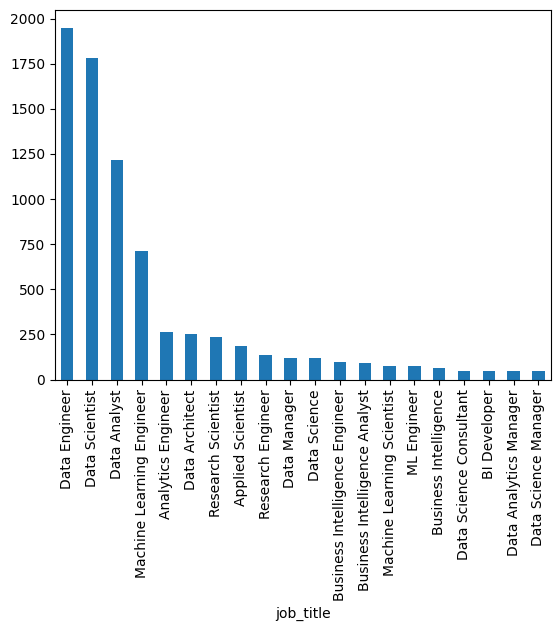

In [ ]:
top_job_title.plot.bar(legend=False)
plt.grid(False)
plt.xticks(rotation=90)
plt.show()

## Recoded Job title

In [ ]:
df_clean.job_title_recode.unique()

array(['Architect', 'Developer', 'Engineer', 'Product Manager',
       'Scientist', 'Technician', 'Analyst', 'Manager', 'Specialist',
       'Biologist', 'Consultant', 'Modeler', 'Associate', 'Practitioner',
       'Researcher'], dtype=object)

In [ ]:
df_clean.job_title_recode.value_counts()

job_title_recode
Engineer           3445
Scientist          2441
Analyst            1484
Manager             328
Architect           260
Developer           117
Specialist           55
Consultant           54
Modeler              44
Product Manager      29
Researcher           13
Practitioner          7
Biologist             2
Associate             2
Technician            1
Name: count, dtype: int64

In [ ]:
df_clean.job_title_recode.value_counts()/count*100

job_title_recode
Engineer           25.439374
Scientist          18.025402
Analyst            10.958499
Manager             2.422094
Architect           1.919953
Developer           0.863979
Specialist          0.406144
Consultant          0.398759
Modeler             0.324915
Product Manager     0.214149
Researcher          0.095998
Practitioner        0.051691
Biologist           0.014769
Associate           0.014769
Technician          0.007384
Name: count, dtype: float64

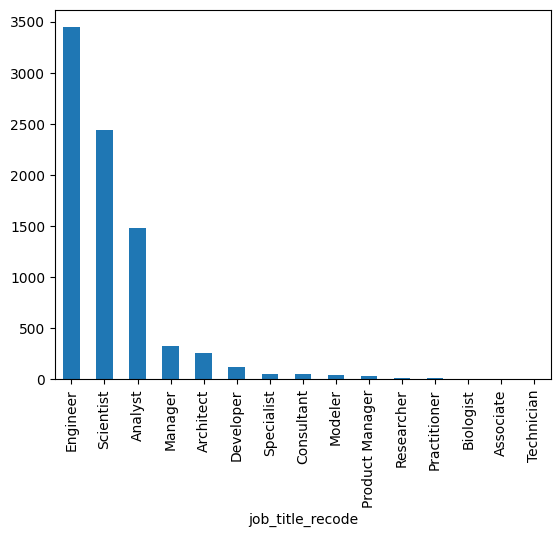

In [ ]:
df_clean.job_title_recode.value_counts().plot.bar(legend=False)
plt.grid(False)
plt.xticks(rotation=90)
plt.show()

## Salary currency

In [ ]:
df_clean.salary_currency.unique()

array(['USD', 'EUR', 'ILS', 'GBP', 'DKK', 'CAD', 'NZD', 'CHF', 'AUD',
       'NOK', 'SGD'], dtype=object)

In [ ]:
df_clean.salary_currency.value_counts()

salary_currency
USD    8097
GBP     111
EUR      40
CAD      21
CHF       6
AUD       2
ILS       1
DKK       1
NZD       1
NOK       1
SGD       1
Name: count, dtype: int64

In [ ]:
df_clean.salary_currency.value_counts()/count*100

salary_currency
USD    59.791759
GBP     0.819672
EUR     0.295377
CAD     0.155073
CHF     0.044307
AUD     0.014769
ILS     0.007384
DKK     0.007384
NZD     0.007384
NOK     0.007384
SGD     0.007384
Name: count, dtype: float64

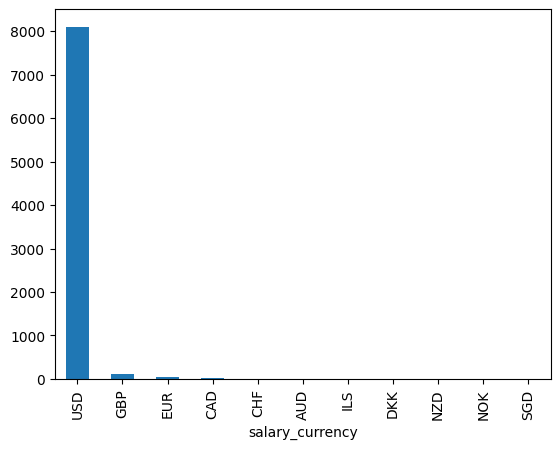

In [ ]:
df_clean.salary_currency.value_counts().plot.bar()
plt.grid(False)
plt.xticks(rotation=90)
plt.show()

## Employee residence

In [ ]:
df_clean.employee_residence.unique()

array(['HR', 'US', 'FR', 'UA', 'BA', 'IL', 'CA', 'GB', 'IN', 'TN', 'SA',
       'TR', 'DE', 'CO', 'DK', 'EG', 'PL', 'MU', 'NL', 'SE', 'BR', 'AU',
       'IE', 'UZ', 'CN', 'NZ', 'CH', 'ZA', 'LT', 'PR', 'ES', 'PH', 'MX',
       'NO', 'DO', 'DZ', 'SG', 'CL', 'IT', 'JP', 'SI', 'AE', 'MD', 'IQ',
       'PT', 'IR', 'JE'], dtype=object)

In [ ]:
df_clean.employee_residence.unique().size

47

In [ ]:
employee_residence = pd.DataFrame(df_clean.employee_residence.value_counts().copy())

In [ ]:
top_employee_residence = employee_residence.head(20)

In [ ]:
top_employee_residence

count
employee_residence       
US                   7732
CA                    230
GB                    181
DE                     24
AU                     16
FR                      9
NZ                      7
CH                      6
IE                      6
NL                      6
ES                      6
BR                      4
IN                      4
PL                      4
PR                      3
CO                      3
LT                      3
UA                      3
AE                      2
PT                      2

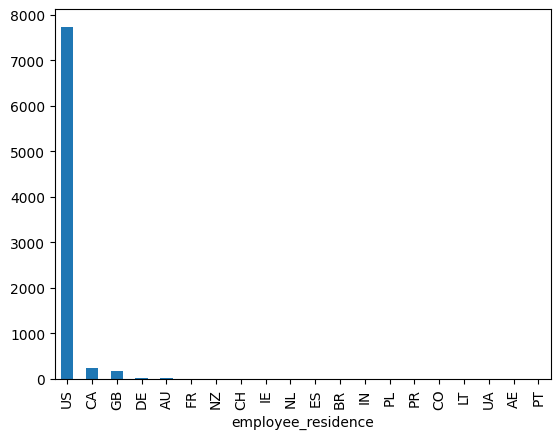

In [ ]:
top_employee_residence.plot.bar(legend=False)
plt.grid(False)
plt.xticks(rotation=90)
plt.show()

## Remote ratio

In [ ]:
df_clean.remote_ratio.unique()

array([100,   0,  50])

In [ ]:
df_clean.remote_ratio.value_counts()

remote_ratio
0      5533
100    2693
50       56
Name: count, dtype: int64

In [ ]:
df_clean.remote_ratio.value_counts()/count*100

remote_ratio
0      40.858071
100    19.886280
50      0.413528
Name: count, dtype: float64

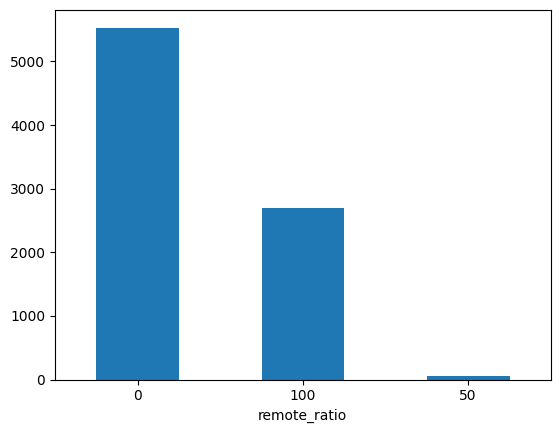

In [ ]:
df_clean.remote_ratio.value_counts().plot.bar()
plt.grid(False)
plt.xticks(rotation=0)
plt.show()

## Company location

In [ ]:
df_clean.company_location.unique()

array(['US', 'FR', 'UA', 'BA', 'IL', 'CA', 'GB', 'IN', 'SA', 'DE', 'CO',
       'DK', 'EG', 'PL', 'MU', 'NL', 'JP', 'SE', 'AU', 'IE', 'HR', 'NZ',
       'CH', 'ZA', 'LT', 'PR', 'ES', 'CZ', 'RU', 'MX', 'NO', 'DZ', 'BR',
       'SI', 'AE', 'IQ', 'PT', 'IR', 'CN'], dtype=object)

In [ ]:
df_clean.company_location.unique().size

39

In [ ]:
company_location = pd.DataFrame(df_clean.company_location.value_counts().copy())

In [ ]:
top_company_location = company_location.head(20)

In [ ]:
top_company_location

count
company_location       
US                 7744
CA                  228
GB                  182
DE                   22
AU                   17
FR                   12
NZ                    7
CH                    6
NL                    6
IE                    6
ES                    5
PL                    4
CO                    3
IN                    3
UA                    3
IL                    3
LT                    3
SA                    2
AE                    2
PR                    2

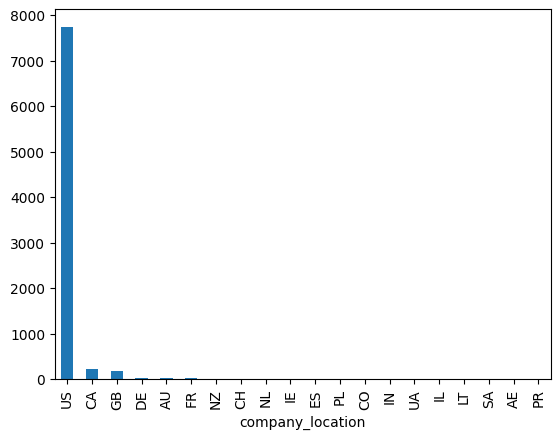

In [ ]:
top_company_location.plot.bar(legend=False)
plt.grid(False)
plt.xticks(rotation=90)
plt.show()

## Company size

In [ ]:
df_clean.company_size.unique()

array(['M', 'L', 'S'], dtype=object)

In [ ]:
df_clean.company_size.value_counts()

company_size
M    7830
L     398
S      54
Name: count, dtype: int64

In [ ]:
df_clean.company_size.value_counts()/count*100

company_size
M    57.820115
L     2.939005
S     0.398759
Name: count, dtype: float64

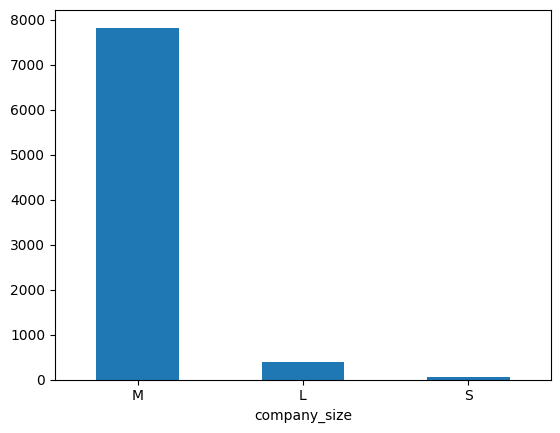

In [ ]:
df_clean.company_size.value_counts().plot.bar()
plt.grid(False)
plt.xticks(rotation=0)
plt.show()

# Hypothesis testing

## Work year

### Exclude category outliers

In [ ]:
df_hypo = df_clean.copy()[['work_year', 'salary_in_usd']]

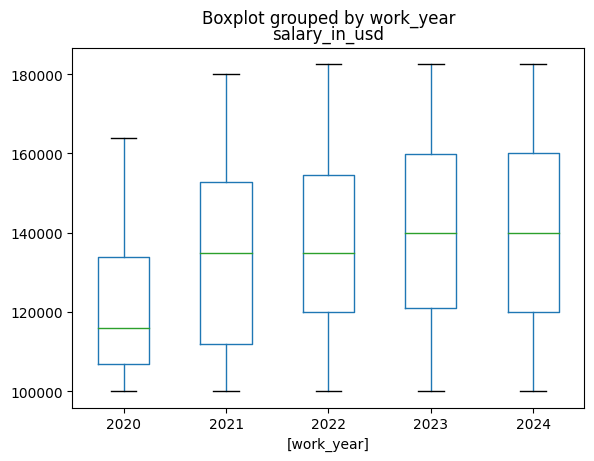

In [ ]:
df_hypo.boxplot(by='work_year', grid = False)
plt.show()

In [ ]:
salary_2020 = np.array(df_hypo[df_hypo.work_year == 2020].copy()[['salary_in_usd']])
salary_2021 = np.array(df_hypo[df_hypo.work_year == 2021].copy()[['salary_in_usd']])
salary_2022 = np.array(df_hypo[df_hypo.work_year == 2022].copy()[['salary_in_usd']])
salary_2023 = np.array(df_hypo[df_hypo.work_year == 2023].copy()[['salary_in_usd']])
salary_2024 = np.array(df_hypo[df_hypo.work_year == 2024].copy()[['salary_in_usd']])

In [ ]:
salary_2020.size

22

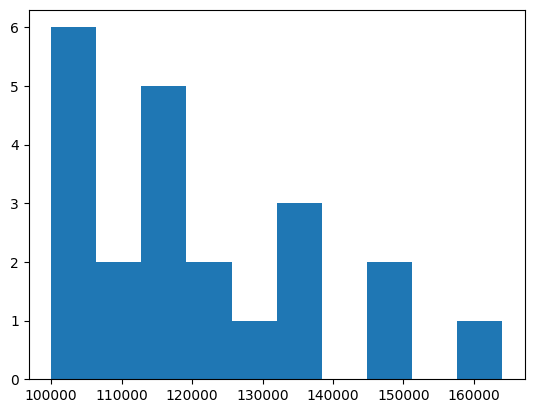

In [ ]:
plt.hist(salary_2020)
plt.show()

In [ ]:
median_2020 = np.median(salary_2020)
median_2020

116052.0

In [ ]:
mad_2020 = stats.median_abs_deviation(salary_2020)[0]
mad_2020

11052.0

In [ ]:
high_2020 = median_2020 + z_alpha*mad_2020
high_2020

127104.0

In [ ]:
low_2020 = median_2020 - z_alpha*mad_2020
low_2020

105000.0

In [ ]:
salary_2021.size

62

In [ ]:
median_2021 = np.median(salary_2021)
median_2021

135000.0

In [ ]:
mad_2021 = stats.median_abs_deviation(salary_2021)[0]
mad_2021

22262.0

In [ ]:
high_2021 = median_2021 + z_alpha*mad_2021
high_2021

157262.0

In [ ]:
low_2021 = median_2021 - z_alpha*mad_2021
low_2021

/usr/local/lib/python3.10/dist-packages/IPython/core/displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


112738.0

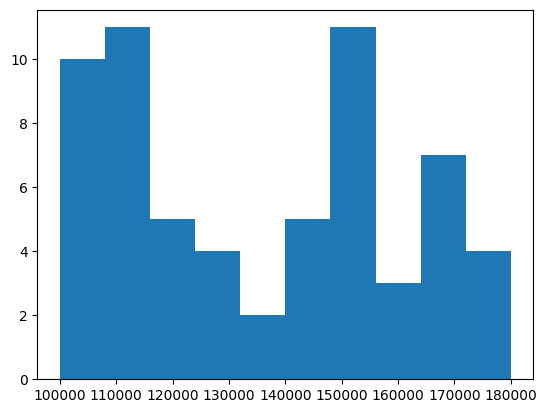

In [ ]:
plt.hist(salary_2021)
plt.show()

In [ ]:
salary_2022.size

868

In [ ]:
median_2022 = np.median(salary_2022)
median_2022

135000.0

In [ ]:
mad_2022 = stats.median_abs_deviation(salary_2022)[0]
mad_2022

17250.0

In [ ]:
high_2022 = median_2022 + z_alpha*mad_2022
high_2022

152250.0

In [ ]:
low_2022 = median_2022 - z_alpha*mad_2022
low_2022

117750.0

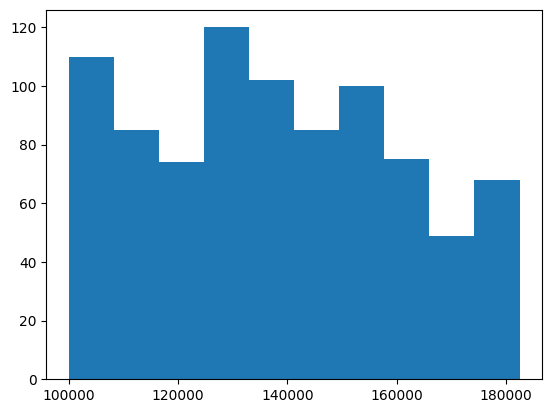

In [ ]:
plt.hist(salary_2022)
plt.show()

In [ ]:
salary_2023.size

4339

In [ ]:
median_2023 = np.median(salary_2023)
median_2023

140000.0

In [ ]:
mad_2023 = stats.median_abs_deviation(salary_2023)[0]
mad_2023

19500.0

In [ ]:
high_2023 = median_2023 + z_alpha*mad_2023
high_2023

159500.0

In [ ]:
low_2023 = median_2023 - z_alpha*mad_2023
low_2023

120500.0

In [ ]:
plt.hist(salary_2023)
plt.show()

In [ ]:
salary_2024.size

2991

In [ ]:
median_2024 = np.median(salary_2024)
median_2024

140000.0

In [ ]:
mad_2024 = stats.median_abs_deviation(salary_2024)[0]
mad_2024

20000.0

In [ ]:
high_2024 = median_2024 + z_alpha*mad_2024
high_2024

160000.0

In [ ]:
low_2024 = median_2024 - z_alpha*mad_2024
low_2024

120000.0

In [ ]:
plt.hist(salary_2024)
plt.show()

In [ ]:
df_hypo = df_hypo[((df_hypo.work_year == 2020) & (df_hypo.salary_in_usd <= high_2020) & (df.salary_in_usd >= low_2020)) |
                  ((df_hypo.work_year == 2021) & (df_hypo.salary_in_usd <= high_2021) & (df.salary_in_usd >= low_2021)) |
                  ((df_hypo.work_year == 2022) & (df_hypo.salary_in_usd <= high_2022) & (df.salary_in_usd >= low_2022)) |
                  ((df_hypo.work_year == 2023) & (df_hypo.salary_in_usd <= high_2023) & (df.salary_in_usd >= low_2023)) |
                  ((df_hypo.work_year == 2024) & (df_hypo.salary_in_usd <= high_2024) & (df.salary_in_usd >= low_2024))]

<ipython-input-2900-e4026620da72>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_hypo = df_hypo[((df_hypo.work_year == 2020) & (df_hypo.salary_in_usd <= high_2020) & (df.salary_in_usd >= low_2020)) |


In [ ]:
df_hypo.boxplot(by='work_year', grid = False)
plt.show()

### Oversampling

In [ ]:
# Create the oversampler
ros = RandomOverSampler(random_state=42)

# Fit the oversampler to the data
X_resampled, y_resampled = ros.fit_resample(np.reshape(df_hypo.salary_in_usd, (-1,1)), np.array(df_hypo.work_year))

In [ ]:
X_resampled = np.reshape(X_resampled, -1)

In [ ]:
X_resampled.size

10865

In [ ]:
y_resampled.size

10865

In [ ]:
df_hypo = pd.DataFrame({'work_year': y_resampled, 'salary_in_usd': X_resampled})

In [ ]:
df_hypo.boxplot(by='work_year', grid = False)
plt.show()

In [ ]:
salary_2020 = np.array(df_hypo[df_hypo.work_year == 2020].copy()[['salary_in_usd']])
salary_2021 = np.array(df_hypo[df_hypo.work_year == 2021].copy()[['salary_in_usd']])
salary_2022 = np.array(df_hypo[df_hypo.work_year == 2022].copy()[['salary_in_usd']])
salary_2023 = np.array(df_hypo[df_hypo.work_year == 2023].copy()[['salary_in_usd']])
salary_2024 = np.array(df_hypo[df_hypo.work_year == 2024].copy()[['salary_in_usd']])

In [ ]:
salary_2020.size

2173

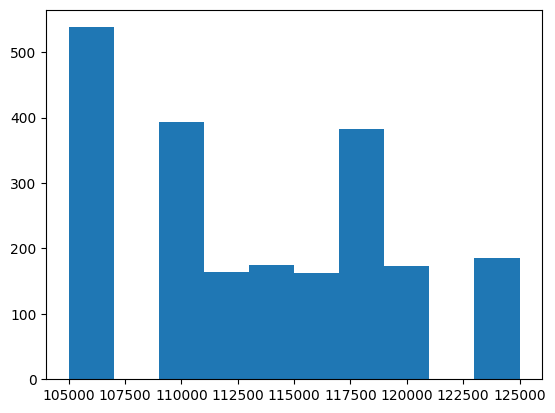

In [ ]:
plt.hist(salary_2020)
plt.show()

In [ ]:
salary_2021.size

2173

In [ ]:
plt.hist(salary_2021)
plt.show()

In [ ]:
salary_2022.size

2173

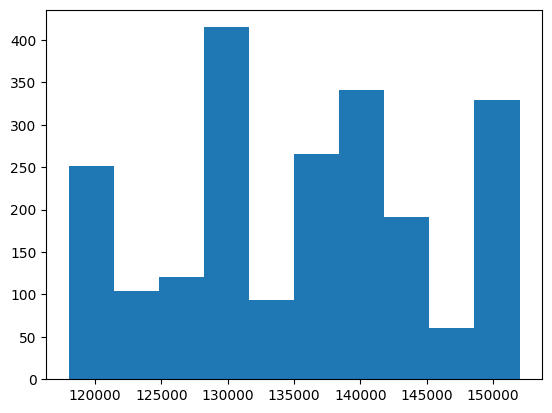

In [ ]:
plt.hist(salary_2022)
plt.show()

In [ ]:
salary_2023.size

2173

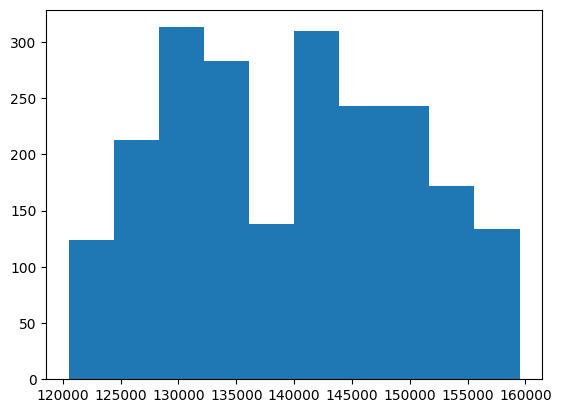

In [ ]:
plt.hist(salary_2023)
plt.show()

In [ ]:
salary_2024.size

2173

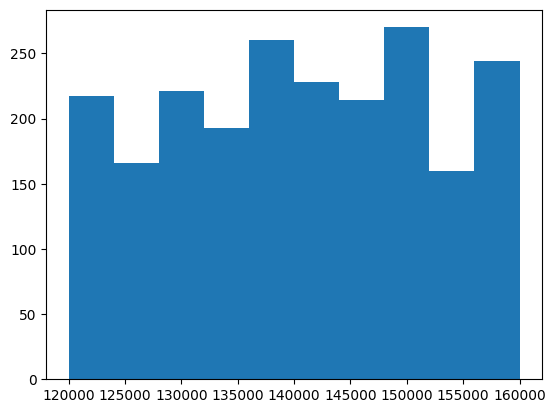

In [ ]:
plt.hist(salary_2024)
plt.show()

### Hypothesis testing

In [ ]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "2021 data engineers have salary no higher than 2020 data engineers."
alternate_hypothesis = "2021 data engineers have salary higher than 2020 data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_2021, salary_2020)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for 2021 is lower than 2020 data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for 2021 is higher than 2020 data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for 2021 and 2020 data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [68.84566731]
P-value: [0.]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary for 2021 is higher than 2020 data engineers.


In [ ]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "2022 data engineers have salary no higher than 2021 data engineers."
alternate_hypothesis = "2022 data engineers have salary higher than 2021 data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_2022, salary_2021)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for 2022 is lower than 2021 data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for 2022 is higher than 2021 data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for 2022 and 2021 data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [-0.37333308]
P-value: [0.70893699]
Decision: Fail to reject the null hypothesis at alpha = 0.05.
Conclusion: There is insufficient evidence to claim a significant difference in average salary for 2022 and 2021 data engineers.


In [ ]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "2023 data engineers have salary no higher than 2022 data engineers."
alternate_hypothesis = "2023 data engineers have salary higher than 2022 data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_2023, salary_2022)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for 2023 is lower than 2022 data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for 2023 is higher than 2022 data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for 2023 and 2022 data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [13.43042346]
P-value: [1.45258563e-39]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary for 2023 is higher than 2022 data engineers.


In [ ]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "2024 data engineers have salary no higher than 2023 data engineers."
alternate_hypothesis = "2024 data engineers have salary higher than 2023 data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_2024, salary_2023)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for 2024 is lower than 2023 data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for 2024 is higher than 2023 data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for 2024 and 2023 data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [1.98643526]
P-value: [0.0471105]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary for 2024 is higher than 2023 data engineers.


In [ ]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "2024 data engineers have salary no higher than 2022 data engineers."
alternate_hypothesis = "2024 data engineers have salary higher than 2022 data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_2024, salary_2022)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for 2024 is lower than 2022 data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for 2024 is higher than 2022 data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for 2024 and 2022 data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [14.59326063]
P-value: [4.37201973e-46]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary for 2024 is higher than 2022 data engineers.


In [ ]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "2024 data engineers have salary no higher than 2021 data engineers."
alternate_hypothesis = "2024 data engineers have salary higher than 2021 data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_2024, salary_2021)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for 2024 is lower than 2021 data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for 2024 is higher than 2021 data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for 2024 and 2021 data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [11.7323001]
P-value: [7.27804508e-31]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary for 2024 is higher than 2021 data engineers.


## Experience level

### Exclude category outliers

In [ ]:
df_hypo = df_clean.copy()[['experience_level', 'salary_in_usd']]

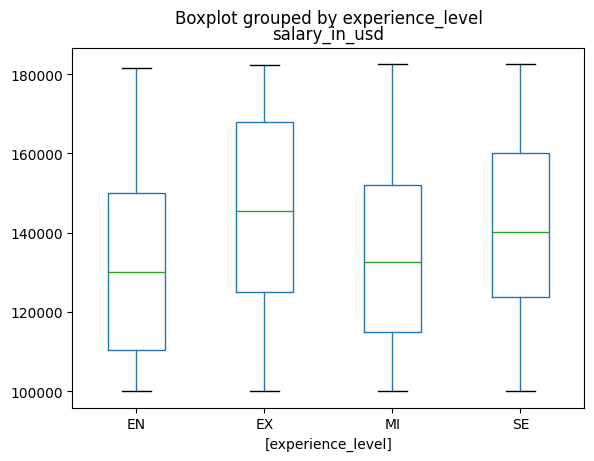

In [ ]:
df_hypo.boxplot(by='experience_level', grid = False)
plt.show()

In [ ]:
salary_EN = np.array(df_hypo[df_hypo.experience_level == 'EN'].copy()[['salary_in_usd']])
salary_MI = np.array(df_hypo[df_hypo.experience_level == 'MI'].copy()[['salary_in_usd']])
salary_SE = np.array(df_hypo[df_hypo.experience_level == 'SE'].copy()[['salary_in_usd']])
salary_EX = np.array(df_hypo[df_hypo.experience_level == 'EX'].copy()[['salary_in_usd']])

In [ ]:
salary_EN.size

410

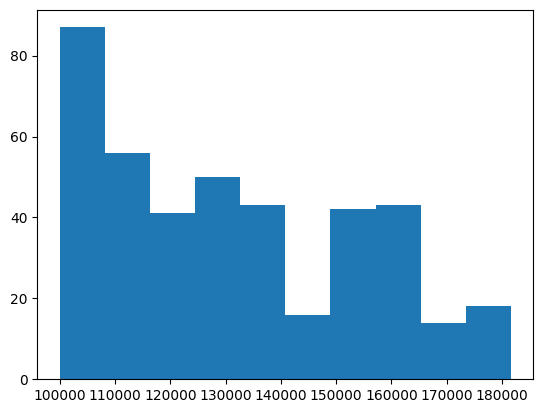

In [ ]:
plt.hist(salary_EN)
plt.show()

In [ ]:
median_EN = np.median(salary_EN)
median_EN

130000.0

In [ ]:
mad_EN = stats.median_abs_deviation(salary_EN)[0]
mad_EN

20000.0

In [ ]:
high_EN = median_EN + z_alpha*mad_EN
high_EN

150000.0

In [ ]:
low_EN = median_EN - z_alpha*mad_EN
low_EN

110000.0

In [ ]:
salary_MI.size

1977

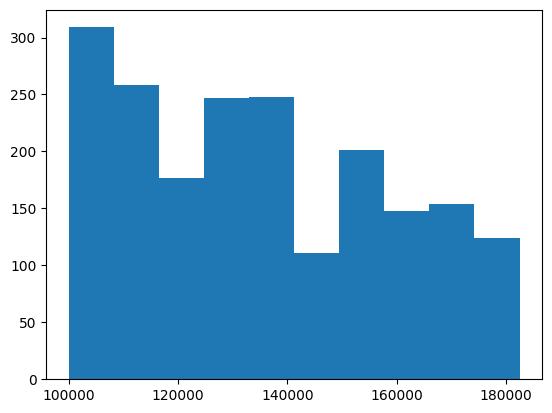

In [ ]:
plt.hist(salary_MI)
plt.show()

In [ ]:
median_MI = np.median(salary_MI)
median_MI

132600.0

In [ ]:
mad_MI = stats.median_abs_deviation(salary_MI)[0]
mad_MI

19037.0

In [ ]:
high_MI = median_MI + z_alpha*mad_MI
high_MI

151637.0

In [ ]:
low_MI = median_MI - z_alpha*mad_MI
low_MI

113563.0

In [ ]:
salary_SE.size

5697

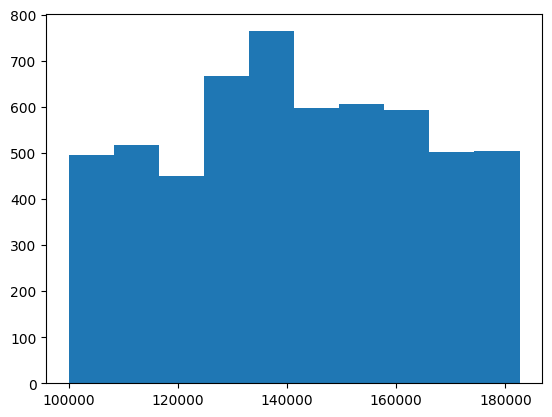

In [ ]:
plt.hist(salary_SE)
plt.show()

In [ ]:
median_SE = np.median(salary_SE)
median_SE

140100.0

In [ ]:
mad_SE = stats.median_abs_deviation(salary_SE)[0]
mad_SE

19100.0

In [ ]:
high_SE = median_SE + z_alpha*mad_SE
high_SE

159200.0

In [ ]:
low_SE = median_SE - z_alpha*mad_SE
low_SE

121000.0

In [ ]:
salary_EX.size

198

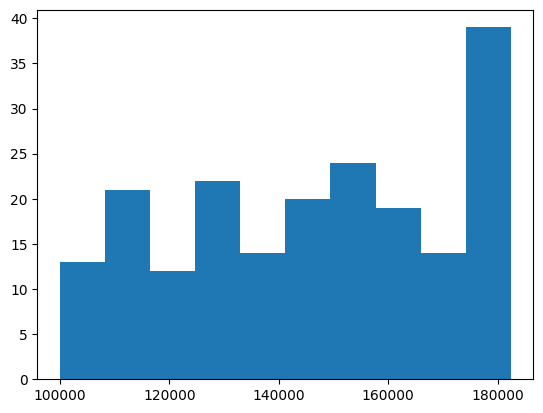

In [ ]:
plt.hist(salary_EX)
plt.show()

In [ ]:
median_EX = np.median(salary_EX)
median_EX

145550.0

In [ ]:
mad_EX = stats.median_abs_deviation(salary_EX)[0]
mad_EX

21250.0

In [ ]:
high_EX = median_EX + z_alpha*mad_EX
high_EX

166800.0

In [ ]:
low_EX = median_EX - z_alpha*mad_EX
low_EX

124300.0

In [ ]:
df_hypo = df_hypo[((df_hypo.experience_level == 'EN') & (df_hypo.salary_in_usd <= high_EN) & (df.salary_in_usd >= low_EN)) |
                  ((df_hypo.experience_level == 'MI') & (df_hypo.salary_in_usd <= high_MI) & (df.salary_in_usd >= low_MI)) |
                  ((df_hypo.experience_level == 'SE') & (df_hypo.salary_in_usd <= high_SE) & (df.salary_in_usd >= low_SE)) |
                  ((df_hypo.experience_level == 'EX') & (df_hypo.salary_in_usd <= high_EX) & (df.salary_in_usd >= low_EX))]

<ipython-input-2952-5aab1fdb8427>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_hypo = df_hypo[((df_hypo.experience_level == 'EN') & (df_hypo.salary_in_usd <= high_EN) & (df.salary_in_usd >= low_EN)) |


In [ ]:
df_hypo.boxplot(by='experience_level', grid = False)
plt.show()

### Oversampling

In [ ]:
# Create the oversampler
ros = RandomOverSampler(random_state=42)

# Fit the oversampler to the data
X_resampled, y_resampled = ros.fit_resample(np.reshape(df_hypo.salary_in_usd, (-1,1)), np.array(df_hypo.experience_level))

In [ ]:
X_resampled = np.reshape(X_resampled, -1)

In [ ]:
X_resampled.size

11424

In [ ]:
y_resampled.size

11424

In [ ]:
df_hypo = pd.DataFrame({'experience_level': y_resampled, 'salary_in_usd': X_resampled})

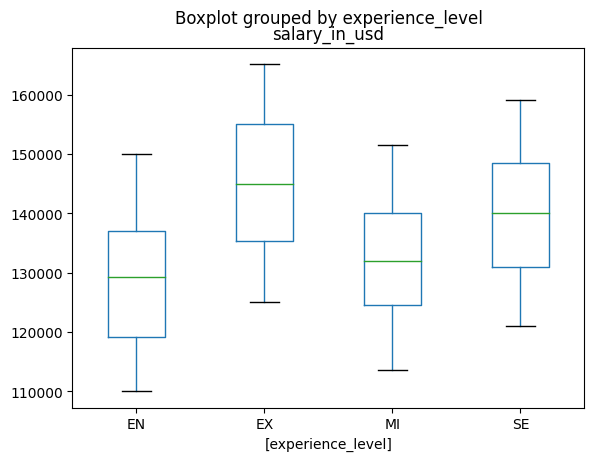

In [ ]:
df_hypo.boxplot(by='experience_level', grid = False)
plt.show()

In [ ]:
salary_EN = np.array(df_hypo[df_hypo.experience_level == 'EN'].copy()[['salary_in_usd']])
salary_MI = np.array(df_hypo[df_hypo.experience_level == 'MI'].copy()[['salary_in_usd']])
salary_SE = np.array(df_hypo[df_hypo.experience_level == 'SE'].copy()[['salary_in_usd']])
salary_EX = np.array(df_hypo[df_hypo.experience_level == 'EX'].copy()[['salary_in_usd']])

In [ ]:
salary_EN.size

2856

In [ ]:
plt.hist(salary_EN)
plt.show()

In [ ]:
salary_MI.size

2856

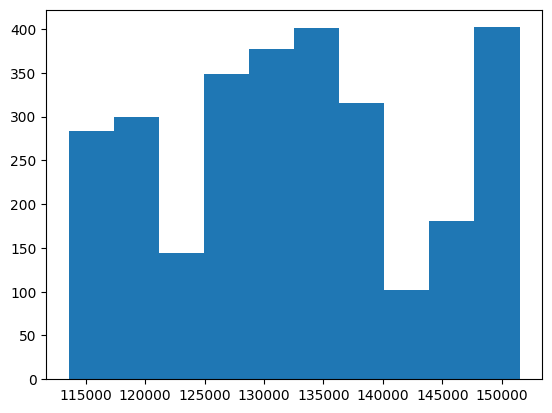

In [ ]:
plt.hist(salary_MI)
plt.show()

In [ ]:
salary_SE.size

2856

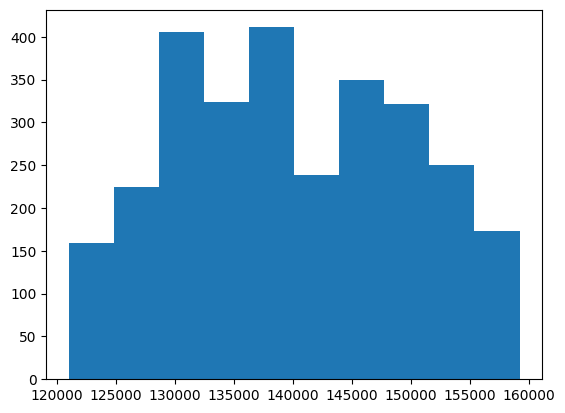

In [ ]:
plt.hist(salary_SE)
plt.show()

In [ ]:
salary_EX.size

2856

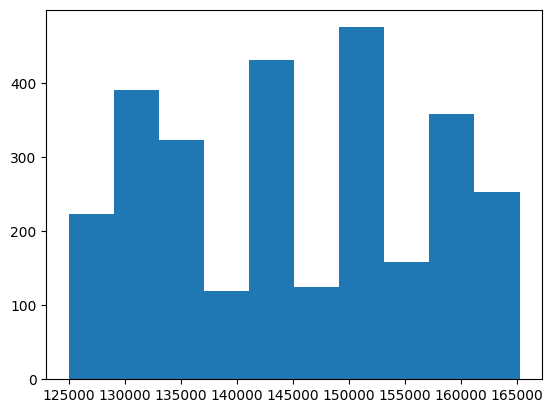

In [ ]:
plt.hist(salary_EX)
plt.show()

### Hypothesis testing

In [ ]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Middle level data engineers have salary no higher than entry level data engineers."
alternate_hypothesis = "Middle level data engineers have salary higher than entry level data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_MI, salary_EN)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for middle level is lower than entry level data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for middle level is higher than entry level data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for middle level and entry level data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [13.76414137]
P-value: [8.77744122e-42]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary for middle level is higher than entry level data engineers.


In [ ]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Senior level data engineers have salary no higher than middle level data engineers."
alternate_hypothesis = "Senior level data engineers have salary higher than middle level data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_SE, salary_MI)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for senior level is lower than middle level data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for senior level is higher than middle level data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for senior level and middle level data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [26.44513978]
P-value: [4.95298343e-138]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary for senior level is higher than middle level data engineers.


In [ ]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Expert level data engineers have salary no higher than senior level data engineers."
alternate_hypothesis = "Expert level data engineers have salary higher than senior level data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_EX, salary_SE)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for expert level is lower than senior level data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for expert level is higher than senior level data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for expert level and senior level data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [17.07513044]
P-value: [2.54666649e-62]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary for expert level is higher than senior level data engineers.


## Employment type

### Exclude category outliers

In [ ]:
df_hypo = df_clean.copy()[['employment_type', 'salary_in_usd']]

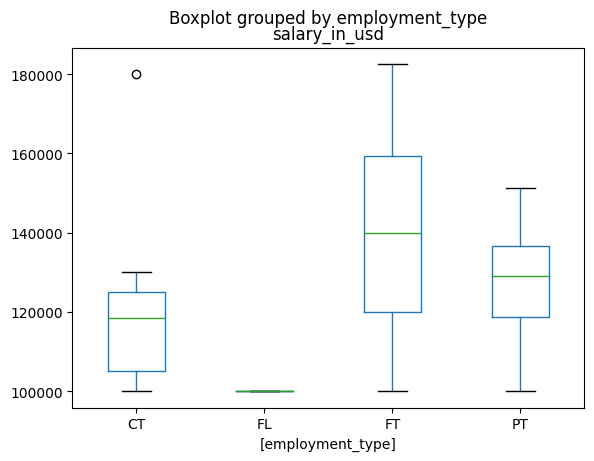

In [ ]:
df_hypo.boxplot(by='employment_type', grid = False)
plt.show()

In [ ]:
salary_FT = np.array(df_hypo[df_hypo.employment_type == 'FT'].copy()[['salary_in_usd']])
salary_CT = np.array(df_hypo[df_hypo.employment_type == 'CT'].copy()[['salary_in_usd']])
salary_PT = np.array(df_hypo[df_hypo.employment_type == 'PT'].copy()[['salary_in_usd']])
salary_FL = np.array(df_hypo[df_hypo.employment_type == 'FL'].copy()[['salary_in_usd']])
salary_not_FT = np.array(df_hypo[df_hypo.employment_type != 'FT'].copy()[['salary_in_usd']])

In [ ]:
salary_FT.size

8261

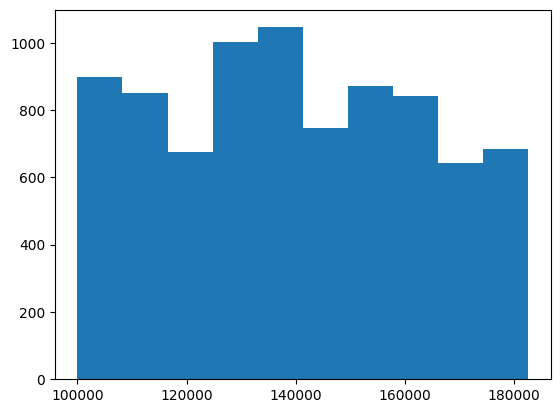

In [ ]:
plt.hist(salary_FT)
plt.show()

In [ ]:
median_FT = np.median(salary_FT)
median_FT

139810.0

In [ ]:
mad_FT = stats.median_abs_deviation(salary_FT)[0]
mad_FT

19810.0

In [ ]:
high_FT = median_FT + z_alpha*mad_FT
high_FT

159620.0

In [ ]:
low_FT = median_FT - z_alpha*mad_FT
low_FT

120000.0

In [ ]:
salary_CT.size

9

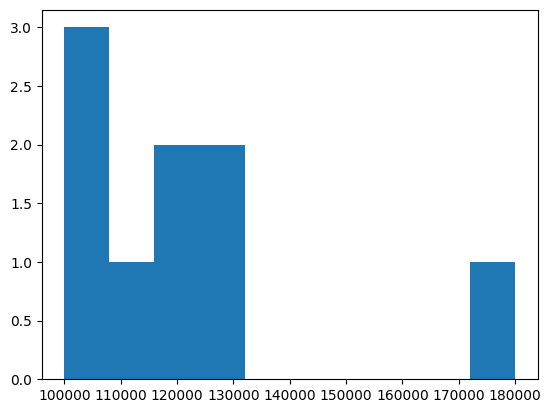

In [ ]:
plt.hist(salary_CT)
plt.show()

In [ ]:
salary_PT.size

10

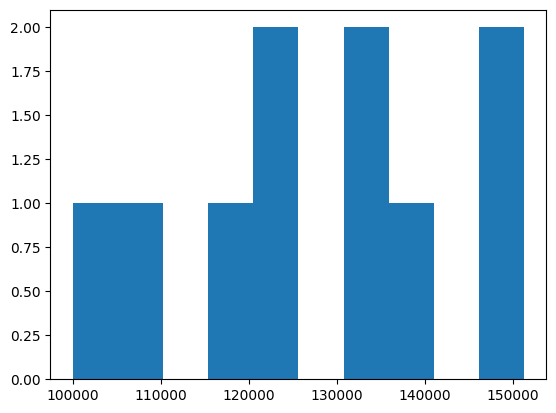

In [ ]:
plt.hist(salary_PT)
plt.show()

In [ ]:
salary_FL.size

2

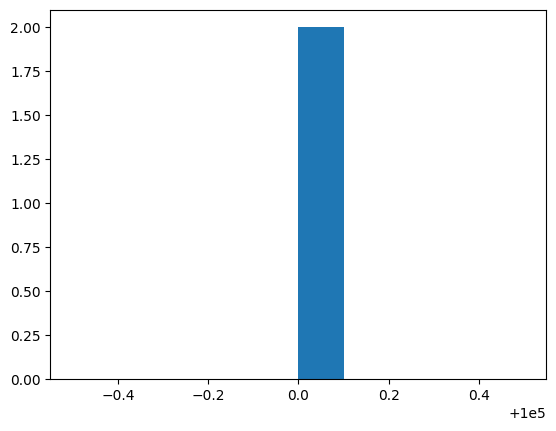

In [ ]:
plt.hist(salary_FL)
plt.show()

In [ ]:
salary_not_FT.size

21

In [ ]:
plt.hist(salary_not_FT)
plt.show()

In [ ]:
median_not_FT = np.median(salary_not_FT)
median_not_FT

120869.0

In [ ]:
mad_not_FT = stats.median_abs_deviation(salary_not_FT)[0]
mad_not_FT

12131.0

In [ ]:
high_not_FT = median_not_FT + z_alpha*mad_not_FT
high_not_FT

133000.0

In [ ]:
low_not_FT = median_not_FT - z_alpha*mad_not_FT
low_not_FT

108738.0

In [ ]:
df_hypo = df_hypo[((df_hypo.employment_type == 'FT') & (df_hypo.salary_in_usd <= high_FT) & (df.salary_in_usd >= low_FT)) |
                  ((df_hypo.employment_type != 'FT') & (df_hypo.salary_in_usd <= high_not_FT) & (df.salary_in_usd >= low_not_FT))]

<ipython-input-2993-f8d64361b8b1>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_hypo = df_hypo[((df_hypo.employment_type == 'FT') & (df_hypo.salary_in_usd <= high_FT) & (df.salary_in_usd >= low_FT)) |


In [ ]:
df_hypo.boxplot(by='employment_type', grid = False)
plt.show()

### Oversampling

In [ ]:
# Create the oversampler
ros = RandomOverSampler(random_state=42)

# Fit the oversampler to the data
X_resampled, y_resampled = ros.fit_resample(np.reshape(df_hypo.salary_in_usd, (-1,1)), np.array(df_hypo.employment_type))

In [ ]:
X_resampled = np.reshape(X_resampled, -1)

In [ ]:
X_resampled.size

12891

In [ ]:
y_resampled.size

12891

In [ ]:
df_hypo = pd.DataFrame({'employment_type': y_resampled, 'salary_in_usd': X_resampled})

In [ ]:
df_hypo.boxplot(by='employment_type', grid = False)
plt.show()

In [ ]:
salary_FT = np.array(df_hypo[df_hypo.employment_type == 'FT'].copy()[['salary_in_usd']])
salary_CT = np.array(df_hypo[df_hypo.employment_type == 'CT'].copy()[['salary_in_usd']])
salary_PT = np.array(df_hypo[df_hypo.employment_type == 'PT'].copy()[['salary_in_usd']])
salary_FL = np.array(df_hypo[df_hypo.employment_type == 'FL'].copy()[['salary_in_usd']])

In [ ]:
salary_FT.size

4297

In [ ]:
plt.hist(salary_FT)
plt.show()

In [ ]:
salary_CT.size

4297

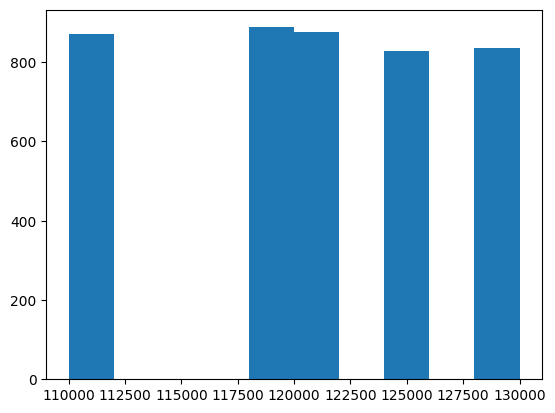

In [ ]:
plt.hist(salary_CT)
plt.show()

In [ ]:
salary_PT.size

4297

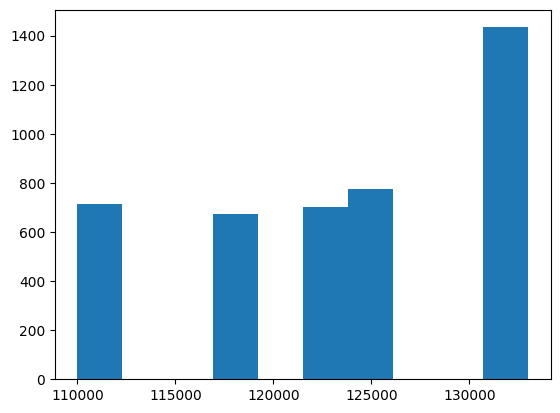

In [ ]:
plt.hist(salary_PT)
plt.show()

In [ ]:
salary_FL.size

0

In [ ]:
plt.hist(salary_FL)
plt.show()

### Hypothesis testing

In [ ]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Fulltime data engineers have salary no higher than contract data engineers."
alternate_hypothesis = "Fulltime data engineers have salary higher than contract data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_FT, salary_CT)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for fulltime is lower than contract data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for fulltime is higher than contract data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for fulltime and contract data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [90.91586472]
P-value: [0.]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary for fulltime is higher than contract data engineers.


In [ ]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Contract data engineers have salary no higher than parttime data engineers."
alternate_hypothesis = "Contract data engineers have salary higher than parttime data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_CT, salary_PT)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for contract is lower than parttime data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for contract is higher than parttime data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for contract and parttime data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [-18.13442623]
P-value: [7.06194557e-71]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary for contract is lower than parttime data engineers.


In [ ]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Parttime data engineers have salary no higher than freelance data engineers."
alternate_hypothesis = "Parttime data engineers have salary higher than freelance data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_PT, salary_FL)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for parttime is lower than freelance data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for parttime is higher than freelance data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for parttime and freelance data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [nan]
P-value: [nan]
Decision: Fail to reject the null hypothesis at alpha = 0.05.
Conclusion: There is insufficient evidence to claim a significant difference in average salary for parttime and freelance data engineers.


In [ ]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Contract data engineers have salary no higher than freelance data engineers."
alternate_hypothesis = "Contract data engineers have salary higher than freelance data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_CT, salary_FL)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for contract is lower than freelance data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for contract is higher than freelance data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for contract and freelance data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [nan]
P-value: [nan]
Decision: Fail to reject the null hypothesis at alpha = 0.05.
Conclusion: There is insufficient evidence to claim a significant difference in average salary for contract and freelance data engineers.


## Job title

### Exclude category outliers

In [ ]:
df_hypo = df_clean.copy()[['job_title_recode', 'salary_in_usd']]

In [ ]:
df_hypo.boxplot(by='job_title_recode', grid = False)
plt.xticks(rotation=90)
plt.show()

In [ ]:
salary_Analyst = np.array(df_hypo[df_hypo.job_title_recode == 'Analyst'].copy()[['salary_in_usd']])
salary_Engineer = np.array(df_hypo[df_hypo.job_title_recode == 'Engineer'].copy()[['salary_in_usd']])
salary_Scientist = np.array(df_hypo[df_hypo.job_title_recode == 'Scientist'].copy()[['salary_in_usd']])
salary_Other = np.array(df_hypo[(df_hypo.job_title_recode != 'Analyst') & (df_hypo.job_title_recode != 'Engineer') & (df_hypo.job_title_recode != 'Scientist')].copy()[['salary_in_usd']])

In [ ]:
salary_Analyst.size

1484

In [ ]:
plt.hist(salary_Analyst)
plt.show()

In [ ]:
median_Analyst = np.median(salary_Analyst)
median_Analyst

127037.5

In [ ]:
mad_Analyst = stats.median_abs_deviation(salary_Analyst)[0]
mad_Analyst

17037.5

In [ ]:
high_Analyst = median_Analyst + z_alpha*mad_Analyst
high_Analyst

144075.0

In [ ]:
low_Analyst = median_Analyst - z_alpha*mad_Analyst
low_Analyst

110000.0

In [ ]:
salary_Engineer.size

3445

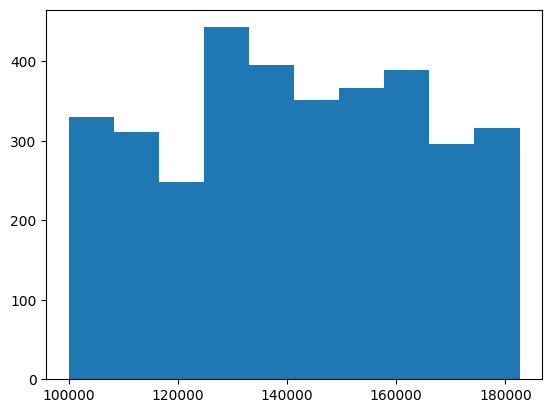

In [ ]:
plt.hist(salary_Engineer)
plt.show()

In [ ]:
median_Engineer = np.median(salary_Engineer)
median_Engineer

141000.0

In [ ]:
mad_Engineer = stats.median_abs_deviation(salary_Engineer)[0]
mad_Engineer

19000.0

In [ ]:
high_Engineer = median_Engineer + z_alpha*mad_Engineer
high_Engineer

160000.0

In [ ]:
low_Engineer = median_Engineer - z_alpha*mad_Engineer
low_Engineer

122000.0

In [ ]:
salary_Scientist.size

2441

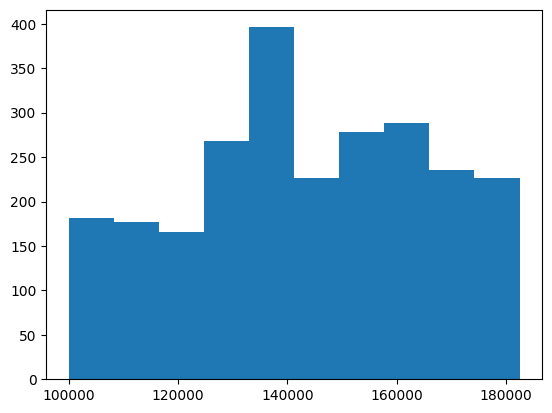

In [ ]:
plt.hist(salary_Scientist)
plt.show()

In [ ]:
median_Scientist = np.median(salary_Scientist)
median_Scientist

142000.0

In [ ]:
mad_Scientist = stats.median_abs_deviation(salary_Scientist)[0]
mad_Scientist

17300.0

In [ ]:
high_Scientist = median_Scientist + z_alpha*mad_Scientist
high_Scientist

159300.0

In [ ]:
low_Scientist = median_Scientist - z_alpha*mad_Scientist
low_Scientist

124700.0

In [ ]:
salary_Other.size

912

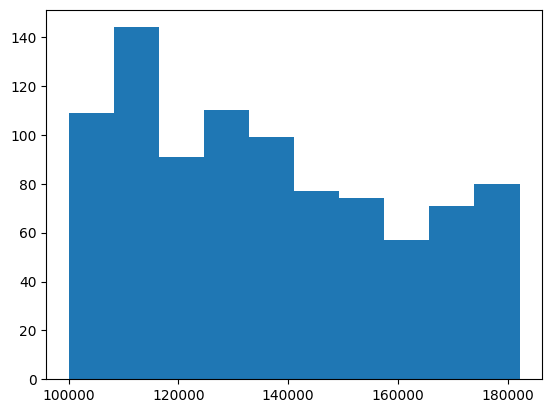

In [ ]:
plt.hist(salary_Other)
plt.show()

In [ ]:
median_Other = np.median(salary_Other)
median_Other

133883.0

In [ ]:
mad_Other = stats.median_abs_deviation(salary_Other)[0]
mad_Other

18883.0

In [ ]:
high_Other = median_Other + z_alpha*mad_Other
high_Other

152766.0

In [ ]:
low_Other = median_Other - z_alpha*mad_Other
low_Other

115000.0

In [ ]:
df_hypo = df_hypo[((df_hypo.job_title_recode == 'Analyst') & (df_hypo.salary_in_usd <= high_Analyst) & (df.salary_in_usd >= low_Analyst)) |
                  ((df_hypo.job_title_recode == 'Engineer') & (df_hypo.salary_in_usd <= high_Engineer) & (df.salary_in_usd >= low_Engineer)) |
                  ((df_hypo.job_title_recode == 'Scientist') & (df_hypo.salary_in_usd <= high_Scientist) & (df.salary_in_usd >= low_Scientist)) |
                  ((df_hypo.job_title_recode != 'FT') & (df_hypo.job_title_recode != 'Engineer') & (df_hypo.job_title_recode != 'Scientist') & (df_hypo.salary_in_usd <= high_Other) & (df.salary_in_usd >= low_Other))]

<ipython-input-3041-4b06b5c766e6>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_hypo = df_hypo[((df_hypo.job_title_recode == 'Analyst') & (df_hypo.salary_in_usd <= high_Analyst) & (df.salary_in_usd >= low_Analyst)) |


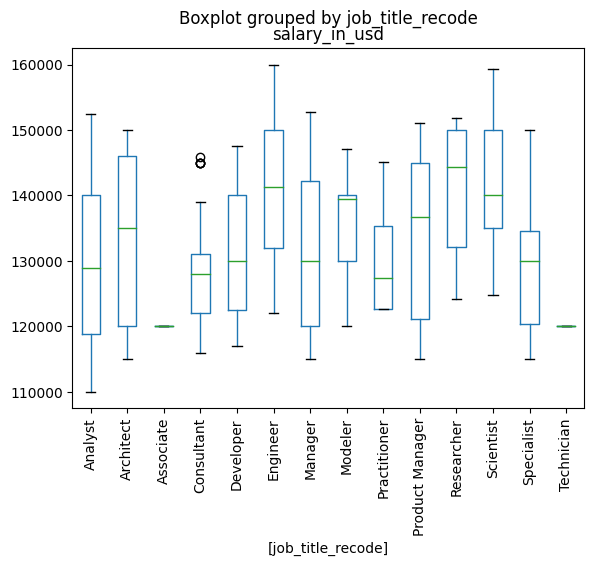

In [ ]:
df_hypo.boxplot(by='job_title_recode', grid = False)
plt.xticks(rotation=90)
plt.show()

### Oversampling

In [ ]:
# Create the oversampler
ros = RandomOverSampler(random_state=42)

# Fit the oversampler to the data
X_resampled, y_resampled = ros.fit_resample(np.reshape(df_hypo.salary_in_usd, (-1,1)), np.array(df_hypo.job_title_recode))

In [ ]:
X_resampled = np.reshape(X_resampled, -1)

In [ ]:
X_resampled.size

25480

In [ ]:
y_resampled.size

25480

In [ ]:
df_hypo = pd.DataFrame({'job_title_recode': y_resampled, 'salary_in_usd': X_resampled})

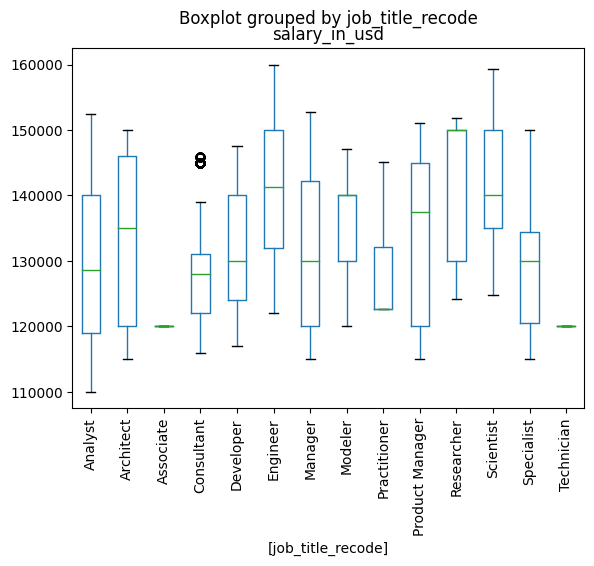

In [ ]:
df_hypo.boxplot(by='job_title_recode', grid = False)
plt.xticks(rotation=90)
plt.show()

In [ ]:
salary_Analyst = np.array(df_hypo[df_hypo.job_title_recode == 'Analyst'].copy()[['salary_in_usd']])
salary_Engineer = np.array(df_hypo[df_hypo.job_title_recode == 'Engineer'].copy()[['salary_in_usd']])
salary_Scientist = np.array(df_hypo[df_hypo.job_title_recode == 'Scientist'].copy()[['salary_in_usd']])
salary_Other = np.array(df_hypo[(df_hypo.job_title_recode != 'Analyst') & (df_hypo.job_title_recode != 'Engineer') & (df_hypo.job_title_recode != 'Scientist')].copy()[['salary_in_usd']])

In [ ]:
salary_Analyst.size

1820

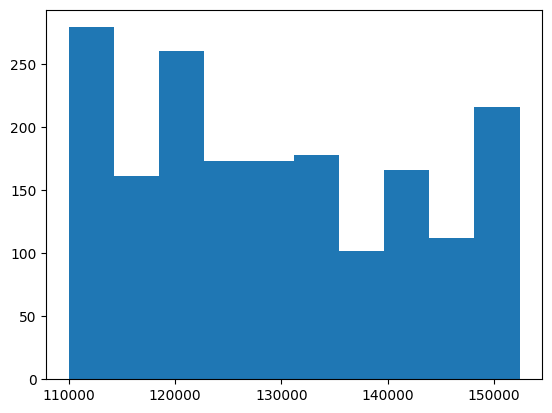

In [ ]:
plt.hist(salary_Analyst)
plt.show()

In [ ]:
salary_Engineer.size

1820

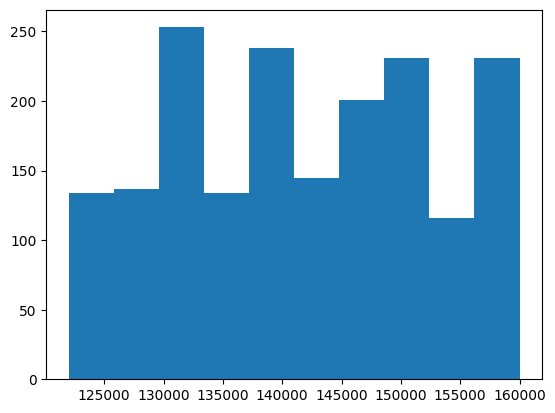

In [ ]:
plt.hist(salary_Engineer)
plt.show()

In [ ]:
salary_Scientist.size

1820

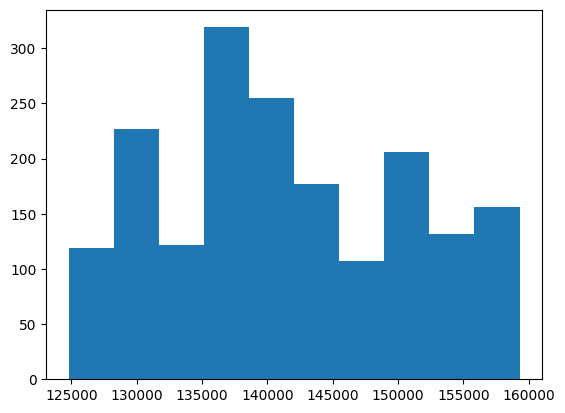

In [ ]:
plt.hist(salary_Scientist)
plt.show()

### Hypothesis testing

In [ ]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Analysts have salary no higher than engineers."
alternate_hypothesis = "Analyst have salary higher than engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_Analyst, salary_Engineer)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for analysts is lower than engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for analysts is higher than engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for analysts and engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [-31.57432489]
P-value: [7.63219348e-175]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary for analysts is lower than engineers.


In [ ]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Scientists have salary no higher than engineers."
alternate_hypothesis = "Scientists have salary higher than engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_Scientist, salary_Engineer)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for scientists is lower than engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for scientists is higher than engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for scientists and engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [-1.3135571]
P-value: [0.18916095]
Decision: Fail to reject the null hypothesis at alpha = 0.05.
Conclusion: There is insufficient evidence to claim a significant difference in average salary for scientists and engineers.


## Remote ratio

### Exclude category outliers

In [ ]:
df_hypo = df_clean.copy()[['remote_ratio', 'salary_in_usd']]

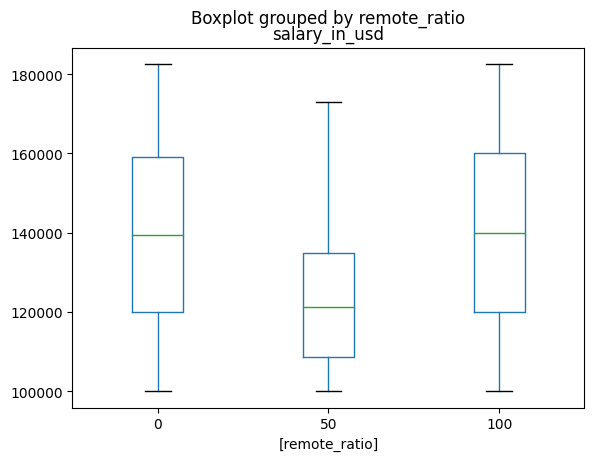

In [ ]:
df_hypo.boxplot(by='remote_ratio', grid = False)
plt.show()

In [ ]:
salary_0 = np.array(df_hypo[df_hypo.remote_ratio == 0].copy()[['salary_in_usd']])
salary_50 = np.array(df_hypo[df_hypo.remote_ratio == 50].copy()[['salary_in_usd']])
salary_100 = np.array(df_hypo[df_hypo.remote_ratio == 100].copy()[['salary_in_usd']])

In [ ]:
salary_0.size

5533

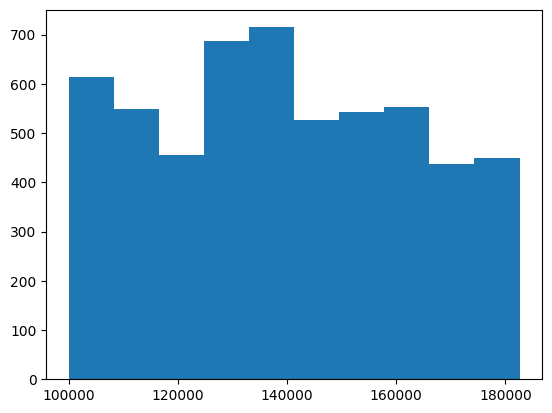

In [ ]:
plt.hist(salary_0)
plt.show()

In [ ]:
median_0 = np.median(salary_0)
median_0

139500.0

In [ ]:
mad_0 = stats.median_abs_deviation(salary_0)[0]
mad_0

19500.0

In [ ]:
high_0 = median_0 + z_alpha*mad_0
high_0

159000.0

In [ ]:
low_0 = median_0 - z_alpha*mad_0
low_0

120000.0

In [ ]:
salary_50.size

56

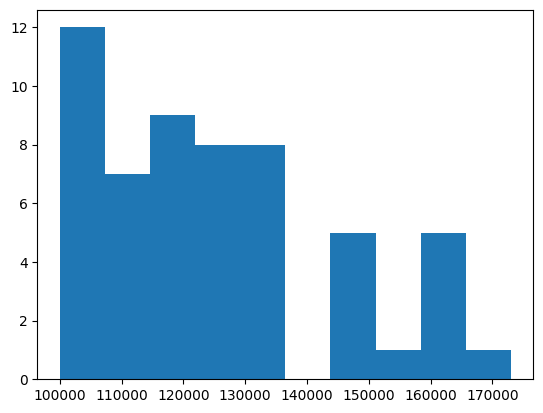

In [ ]:
plt.hist(salary_50)
plt.show()

In [ ]:
median_50 = np.median(salary_50)
median_50

121319.0

In [ ]:
mad_50 = stats.median_abs_deviation(salary_50)[0]
mad_50

13335.0

In [ ]:
high_50 = median_50 + z_alpha*mad_50
high_50

134654.0

In [ ]:
low_50 = median_50 - z_alpha*mad_50
low_50

107984.0

In [ ]:
salary_100.size

2693

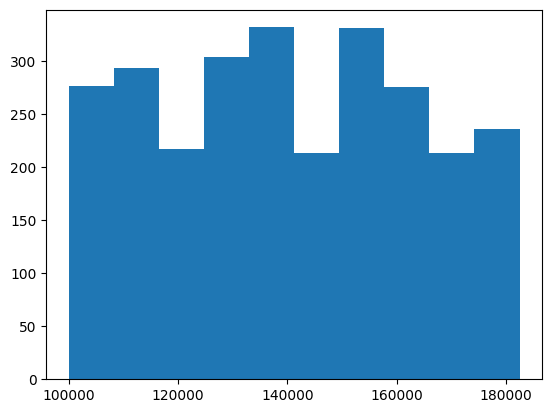

In [ ]:
plt.hist(salary_100)
plt.show()

In [ ]:
median_100 = np.median(salary_100)
median_100

140000.0

In [ ]:
mad_100 = stats.median_abs_deviation(salary_100)[0]
mad_100

20000.0

In [ ]:
high_100 = median_100 + z_alpha*mad_100
high_100

160000.0

In [ ]:
low_100 = median_100 - z_alpha*mad_100
low_100

120000.0

In [ ]:
df_hypo = df_hypo[((df_hypo.remote_ratio == 0) & (df_hypo.salary_in_usd <= high_0) & (df.salary_in_usd >= low_0)) |
                  ((df_hypo.remote_ratio == 50) & (df_hypo.salary_in_usd <= high_50) & (df.salary_in_usd >= low_50)) |
                  ((df_hypo.remote_ratio == 100) & (df_hypo.salary_in_usd <= high_100) & (df.salary_in_usd >= low_100))]

<ipython-input-3079-ff09bd178e42>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_hypo = df_hypo[((df_hypo.remote_ratio == 0) & (df_hypo.salary_in_usd <= high_0) & (df.salary_in_usd >= low_0)) |


In [ ]:
df_hypo.boxplot(by='remote_ratio', grid = False)
plt.show()

### Oversampling

In [ ]:
# Create the oversampler
ros = RandomOverSampler(random_state=42)

# Fit the oversampler to the data
X_resampled, y_resampled = ros.fit_resample(np.reshape(df_hypo.salary_in_usd, (-1,1)), np.array(df_hypo.remote_ratio))

In [ ]:
X_resampled = np.reshape(X_resampled, -1)

In [ ]:
X_resampled.size

8634

In [ ]:
y_resampled.size

8634

In [ ]:
df_hypo = pd.DataFrame({'remote_ratio': y_resampled, 'salary_in_usd': X_resampled})

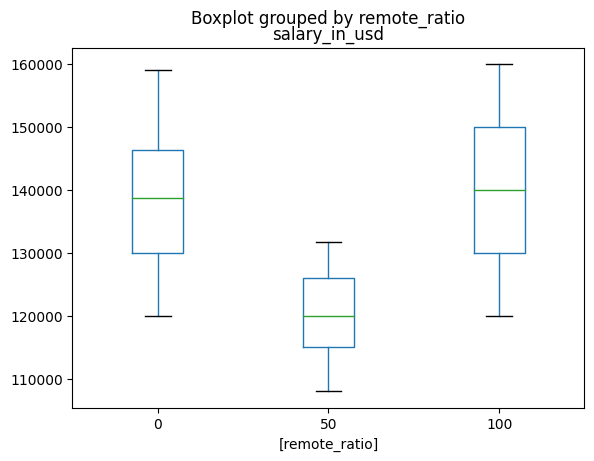

In [ ]:
df_hypo.boxplot(by='remote_ratio', grid = False)
plt.show()

In [ ]:
salary_0 = np.array(df_hypo[df_hypo.remote_ratio == 0].copy()[['salary_in_usd']])
salary_50 = np.array(df_hypo[df_hypo.remote_ratio == 50].copy()[['salary_in_usd']])
salary_100 = np.array(df_hypo[df_hypo.remote_ratio == 100].copy()[['salary_in_usd']])

In [ ]:
salary_0.size

2878

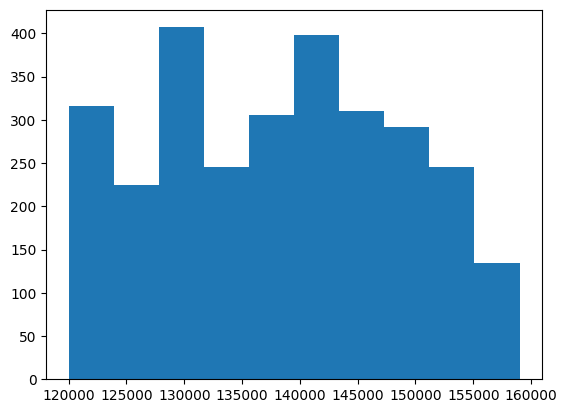

In [ ]:
plt.hist(salary_0)
plt.show()

In [ ]:
salary_50.size

2878

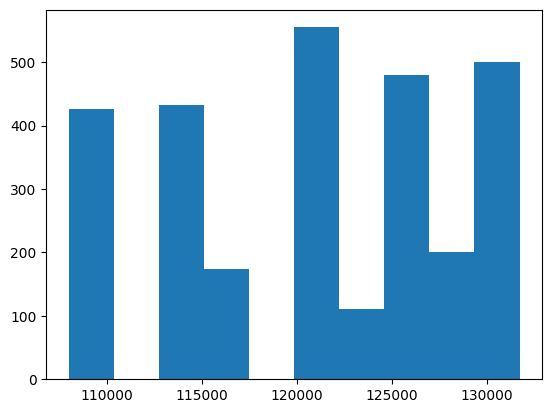

In [ ]:
plt.hist(salary_50)
plt.show()

In [ ]:
salary_100.size

2878

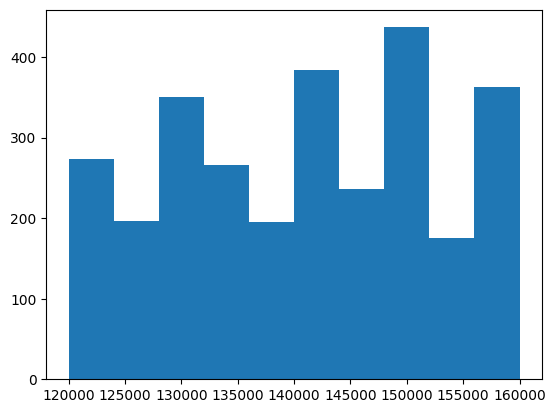

In [ ]:
plt.hist(salary_100)
plt.show()

### Hypothesis testing

In [ ]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "On-site data engineers have salary no higher than hybrid data engineers."
alternate_hypothesis = "On-site data engineers have salary higher than hybrid data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_0, salary_50)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for onsite is lower than hybrid data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for onsite is higher than hybrid data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for on-site and hybrid data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [71.91492762]
P-value: [0.]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary for onsite is higher than hybrid data engineers.


In [ ]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Remote data engineers have salary no higher than hybrid data engineers."
alternate_hypothesis = "Remote data engineers have salary higher than hybrid data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_100, salary_50)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for remote is lower than hybrid data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for remote is higher than hybrid data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for remote and hybrid data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [76.14147166]
P-value: [0.]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary for remote is higher than hybrid data engineers.


In [ ]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Onsite data engineers have salary no higher than remote data engineers."
alternate_hypothesis = "Onsite data engineers have salary higher than remote data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_100, salary_0)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for remote is lower than onsite data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for remote is higher than onsite data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for remote and onsite data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [8.22686653]
P-value: [2.87685391e-16]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary for remote is higher than onsite data engineers.


## Company size

### Exclude category outliers

In [ ]:
df_hypo = df_clean.copy()[['company_size', 'salary_in_usd']]

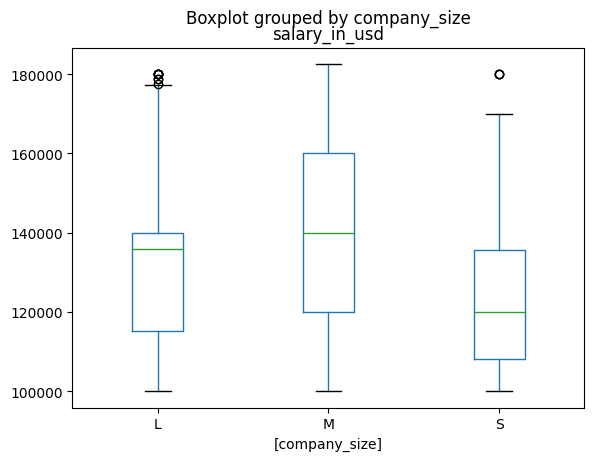

In [ ]:
df_hypo.boxplot(by='company_size', grid = False)
plt.show()

In [ ]:
salary_S = np.array(df_hypo[df_hypo.company_size == 'S'].copy()[['salary_in_usd']])
salary_M = np.array(df_hypo[df_hypo.company_size == 'M'].copy()[['salary_in_usd']])
salary_L = np.array(df_hypo[df_hypo.company_size == 'L'].copy()[['salary_in_usd']])

In [ ]:
salary_S.size

54

In [ ]:
plt.hist(salary_S)
plt.show()

In [ ]:
median_S = np.median(salary_S)
median_S

120000.0

In [ ]:
mad_S = stats.median_abs_deviation(salary_S)[0]
mad_S

12016.0

In [ ]:
high_S = median_S + z_alpha*mad_S
high_S

132016.0

In [ ]:
low_S = median_S - z_alpha*mad_S
low_S

107984.0

In [ ]:
salary_M.size

7830

In [ ]:
plt.hist(salary_M)
plt.show()

In [ ]:
median_M = np.median(salary_M)
median_M

140000.0

In [ ]:
mad_M = stats.median_abs_deviation(salary_M)[0]
mad_M

20000.0

In [ ]:
high_M = median_M + z_alpha*mad_M
high_M

160000.0

In [ ]:
low_M = median_M - z_alpha*mad_M
low_M

120000.0

In [ ]:
salary_L.size

398

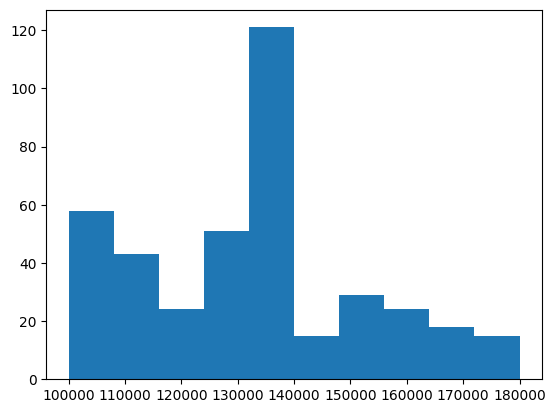

In [ ]:
plt.hist(salary_L)
plt.show()

In [ ]:
median_L = np.median(salary_L)
median_L

136000.0

In [ ]:
mad_L = stats.median_abs_deviation(salary_L)[0]
mad_L

13100.0

In [ ]:
high_L = median_L + z_alpha*mad_L
high_L

149100.0

In [ ]:
low_L = median_L - z_alpha*mad_L
low_L

122900.0

In [ ]:
df_hypo = df_hypo[((df_hypo.company_size == 'S') & (df_hypo.salary_in_usd <= high_S) & (df.salary_in_usd >= low_S)) |
                  ((df_hypo.company_size == 'M') & (df_hypo.salary_in_usd <= high_M) & (df.salary_in_usd >= low_M)) |
                  ((df_hypo.company_size == 'L') & (df_hypo.salary_in_usd <= high_L) & (df.salary_in_usd >= low_L))]

<ipython-input-3118-710502111d5c>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_hypo = df_hypo[((df_hypo.company_size == 'S') & (df_hypo.salary_in_usd <= high_S) & (df.salary_in_usd >= low_S)) |


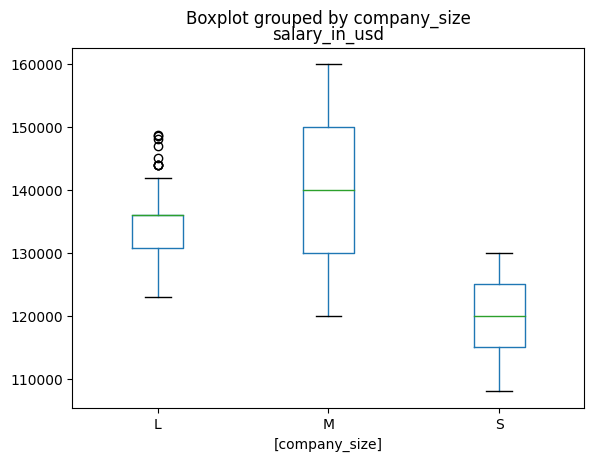

In [ ]:
df_hypo.boxplot(by='company_size', grid = False)
plt.show()

### Oversampling

In [ ]:
# Create the oversampler
ros = RandomOverSampler(random_state=42)

# Fit the oversampler to the data
X_resampled, y_resampled = ros.fit_resample(np.reshape(df_hypo.salary_in_usd, (-1,1)), np.array(df_hypo.company_size))

In [ ]:
X_resampled = np.reshape(X_resampled, -1)

In [ ]:
X_resampled.size

12954

In [ ]:
y_resampled.size

12954

In [ ]:
df_hypo = pd.DataFrame({'company_size': y_resampled, 'salary_in_usd': X_resampled})

In [ ]:
df_hypo.boxplot(by='company_size', grid = False)
plt.show()

In [ ]:
salary_S = np.array(df_hypo[df_hypo.company_size == 'S'].copy()[['salary_in_usd']])
salary_M = np.array(df_hypo[df_hypo.company_size == 'M'].copy()[['salary_in_usd']])
salary_L = np.array(df_hypo[df_hypo.company_size == 'L'].copy()[['salary_in_usd']])

In [ ]:
salary_S.size

4318

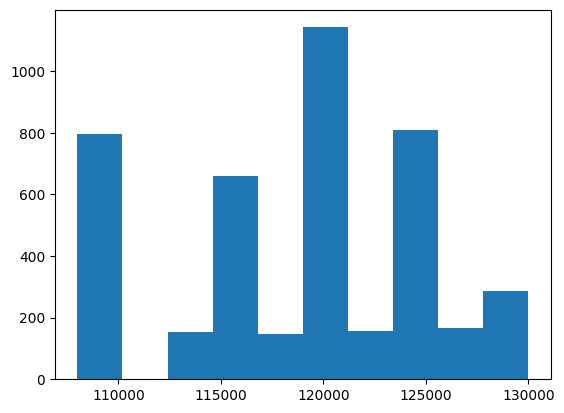

In [ ]:
plt.hist(salary_S)
plt.show()

In [ ]:
salary_M.size

4318

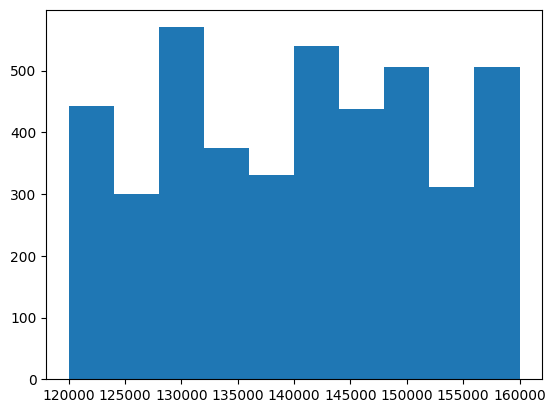

In [ ]:
plt.hist(salary_M)
plt.show()

In [ ]:
salary_L.size

4318

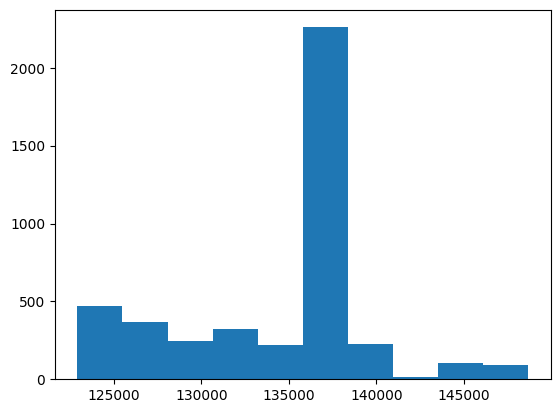

In [ ]:
plt.hist(salary_L)
plt.show()

### Hypothesis testing

In [ ]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Middle-sized company data engineers have salary no higher than small-sized company data engineers."
alternate_hypothesis = "Middle-sized company data engineers have salary higher than small-sized company data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_M, salary_S)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for middle-sized company is lower than small-sized company data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for middle-sized company is higher than small-sized company data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for middle and small-sized company data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [103.62416631]
P-value: [0.]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary for middle-sized company is higher than small-sized company data engineers.


In [ ]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Large-sized company data engineers have salary no higher than middle-sized company data engineers."
alternate_hypothesis = "Large-sized company data engineers have salary higher than middle-sized company data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_L, salary_M)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for large-sized company is lower than middle-sized company data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for large-sized company is higher than middle-sized company data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for large and middle-sized company data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [-31.48993934]
P-value: [4.1347324e-196]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary for large-sized company is lower than middle-sized company data engineers.


In [ ]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Large-sized company data engineers have salary no higher than small-sized company data engineers."
alternate_hypothesis = "Large-sized company data engineers have salary higher than small-sized company data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_L, salary_S)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for large-sized company is lower than small-sized company data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for large-sized company is higher than small-sized company data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for large and small-sized company data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [119.89581784]
P-value: [0.]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary for large-sized company is higher than small-sized company data engineers.


# Recode variables

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8282 entries, 4 to 16532
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           8282 non-null   int64 
 1   experience_level    8282 non-null   object
 2   employment_type     8282 non-null   object
 3   job_title           8282 non-null   object
 4   job_title_recode    8282 non-null   object
 5   salary              8282 non-null   int64 
 6   salary_currency     8282 non-null   object
 7   salary_in_usd       8282 non-null   int64 
 8   employee_residence  8282 non-null   object
 9   remote_ratio        8282 non-null   int64 
 10  company_location    8282 non-null   object
 11  company_size        8282 non-null   object
dtypes: int64(4), object(8)
memory usage: 1.1+ MB


##Work year

In [ ]:
work_year_dummy = pd.get_dummies(df_clean.work_year)

In [ ]:
work_year_dummy = work_year_dummy.set_axis(['work_year_2020', 'work_year_2021', 'work_year_2022', 'work_year_2023', 'work_year_2024'], axis=1)

In [ ]:
df_clean = pd.concat([df_clean, work_year_dummy], axis=1)

##Experience level

In [ ]:
df_clean.experience_level.value_counts()

experience_level
SE    5697
MI    1977
EN     410
EX     198
Name: count, dtype: int64

In [ ]:
df_clean['experience_level_recode'] = np.where(df_clean.experience_level == 'EN', 0,
                                      np.where(df_clean.experience_level == 'MI', 1,
                                      np.where(df_clean.experience_level == 'SE', 2, 3)))

In [ ]:
df_clean.experience_level_recode.value_counts()

experience_level_recode
2    5697
1    1977
0     410
3     198
Name: count, dtype: int64

##Employment type

In [ ]:
df_clean['employment_type_FT'] = np.where(df_clean.employment_type == 'FT', True, False)

In [ ]:
df_clean.employment_type_FT.value_counts()

employment_type_FT
True     8261
False      21
Name: count, dtype: int64

##Job title

###Analyst

In [ ]:
df_clean['job_title_Analyst'] = np.where(df_clean.job_title_recode == 'Analyst', True, False)

In [ ]:
df_clean.job_title_Analyst.value_counts()

job_title_Analyst
False    6798
True     1484
Name: count, dtype: int64

###Engineer

In [ ]:
df_clean['job_title_Engineer'] = np.where(df_clean.job_title_recode == 'Engineer', True, False)

In [ ]:
df_clean.job_title_Engineer.value_counts()

job_title_Engineer
False    4837
True     3445
Name: count, dtype: int64

###Scientist

In [ ]:
df_clean['job_title_Scientist'] = np.where(df_clean.job_title_recode == 'Scientist', True, False)

In [ ]:
df_clean.job_title_Scientist.value_counts()

job_title_Scientist
False    5841
True     2441
Name: count, dtype: int64

##Salary currency

In [ ]:
df_clean['salary_currency_USD'] = np.where(df_clean.salary_currency == 'USD', True, False)

In [ ]:
df_clean.salary_currency_USD.value_counts()

salary_currency_USD
True     8097
False     185
Name: count, dtype: int64

##Employee residence

In [ ]:
df_clean['employee_residence_US'] = np.where(df_clean.employee_residence == 'US', True, False)

In [ ]:
df_clean.employee_residence_US.value_counts()

employee_residence_US
True     7732
False     550
Name: count, dtype: int64

##Remote ratio

In [ ]:
remote_ratio_dummy = pd.get_dummies(df_clean.remote_ratio)

In [ ]:
remote_ratio_dummy = remote_ratio_dummy.set_axis(['remote_ratio_0', 'remote_ratio_50', 'remote_ratio_100'], axis=1)

In [ ]:
df_clean = pd.concat([df_clean, remote_ratio_dummy], axis=1)

##Company location

In [ ]:
df_clean['company_location_US'] = np.where(df_clean.company_location == 'US', True, False)

In [ ]:
df_clean.company_location_US.value_counts()

company_location_US
True     7744
False     538
Name: count, dtype: int64

##Company size

In [ ]:
company_size_dummy = pd.get_dummies(df_clean.company_size)

In [ ]:
company_size_dummy = company_size_dummy.set_axis(['company_size_L', 'company_size_M', 'company_size_S'], axis=1)

In [ ]:
df_clean = pd.concat([df_clean, company_size_dummy], axis=1)

##Drop original columns

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8282 entries, 4 to 16532
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   work_year                8282 non-null   int64 
 1   experience_level         8282 non-null   object
 2   employment_type          8282 non-null   object
 3   job_title                8282 non-null   object
 4   job_title_recode         8282 non-null   object
 5   salary                   8282 non-null   int64 
 6   salary_currency          8282 non-null   object
 7   salary_in_usd            8282 non-null   int64 
 8   employee_residence       8282 non-null   object
 9   remote_ratio             8282 non-null   int64 
 10  company_location         8282 non-null   object
 11  company_size             8282 non-null   object
 12  work_year_2020           8282 non-null   bool  
 13  work_year_2021           8282 non-null   bool  
 14  work_year_2022           8282 non-null   boo

In [ ]:
df_mod = df_clean.copy()

In [ ]:
df_mod.drop(columns=['work_year', 'experience_level', 'employment_type', 'job_title', 'job_title_recode', 'salary', 'salary_currency', 'employee_residence', 'remote_ratio', 'company_location', 'company_size'], inplace = True)

In [ ]:
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8282 entries, 4 to 16532
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   salary_in_usd            8282 non-null   int64
 1   work_year_2020           8282 non-null   bool 
 2   work_year_2021           8282 non-null   bool 
 3   work_year_2022           8282 non-null   bool 
 4   work_year_2023           8282 non-null   bool 
 5   work_year_2024           8282 non-null   bool 
 6   experience_level_recode  8282 non-null   int64
 7   employment_type_FT       8282 non-null   bool 
 8   job_title_Analyst        8282 non-null   bool 
 9   job_title_Engineer       8282 non-null   bool 
 10  job_title_Scientist      8282 non-null   bool 
 11  salary_currency_USD      8282 non-null   bool 
 12  employee_residence_US    8282 non-null   bool 
 13  remote_ratio_0           8282 non-null   bool 
 14  remote_ratio_50          8282 non-null   bool 
 15  remote_r

In [ ]:
df_mod = df_mod.astype(int)

In [ ]:
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8282 entries, 4 to 16532
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   salary_in_usd            8282 non-null   int64
 1   work_year_2020           8282 non-null   int64
 2   work_year_2021           8282 non-null   int64
 3   work_year_2022           8282 non-null   int64
 4   work_year_2023           8282 non-null   int64
 5   work_year_2024           8282 non-null   int64
 6   experience_level_recode  8282 non-null   int64
 7   employment_type_FT       8282 non-null   int64
 8   job_title_Analyst        8282 non-null   int64
 9   job_title_Engineer       8282 non-null   int64
 10  job_title_Scientist      8282 non-null   int64
 11  salary_currency_USD      8282 non-null   int64
 12  employee_residence_US    8282 non-null   int64
 13  remote_ratio_0           8282 non-null   int64
 14  remote_ratio_50          8282 non-null   int64
 15  remote_r

In [ ]:
import seaborn as sns

In [ ]:
df_mod.corr()

salary_in_usd  work_year_2020  work_year_2021  \
salary_in_usd                 1.000000       -0.040624       -0.017421   
work_year_2020               -0.040624        1.000000       -0.004482   
work_year_2021               -0.017421       -0.004482        1.000000   
work_year_2022               -0.029842       -0.017659       -0.029716   
work_year_2023                0.022122       -0.054138       -0.091105   
work_year_2024                0.003507       -0.038803       -0.065298   
experience_level_recode       0.150706       -0.043253       -0.024542   
employment_type_FT            0.036272       -0.044043       -0.023475   
job_title_Analyst            -0.174321       -0.011879       -0.022315   
job_title_Engineer            0.071846       -0.000719       -0.024980   
job_title_Scientist           0.102988        0.002654        0.002232   
salary_currency_USD           0.108277       -0.071569       -0.100619   
employee_residence_US         0.090476       -0.071026       -0.078099   
remote_ratio_0               -0.004153       -0.063254       -0.090491   
remote_ratio_50              -0.051343        0.196117        0.163763   
remote_ratio_100              0.013157        0.029278        0.062318   
company_location_US           0.086874       -0.062544       -0.068048   
company_size_L               -0.066279        0.109050        0.222807   
company_size_M                0.079990       -0.152836       -0.275136   
company_size_S               -0.049622        0.141553        0.184413   

                         work_year_2022  work_year_2023  work_year_2024  \
salary_in_usd                 -0.029842        0.022122        0.003507   
work_year_2020                -0.017659       -0.054138       -0.038803   
work_year_2021                -0.029716       -0.091105       -0.065298   
work_year_2022                 1.000000       -0.358934       -0.257260   
work_year_2023                -0.358934        1.000000       -0.788716   
work_year_2024                -0.257260       -0.788716        1.000000   
experience_level_recode        0.034972        0.128811       -0.147194   
employment_type_FT            -0.021940        0.033661       -0.012076   
job_title_Analyst              0.011788       -0.031191        0.030192   
job_title_Engineer             0.009553        0.047647       -0.051074   
job_title_Scientist           -0.005906       -0.014242        0.017889   
salary_currency_USD           -0.036307        0.029321        0.018391   
employee_residence_US         -0.000565        0.006941        0.014769   
remote_ratio_0                -0.154772        0.003707        0.117859   
remote_ratio_50                0.053541       -0.033451       -0.049766   
remote_ratio_100               0.146221        0.002125       -0.109774   
company_location_US            0.003815        0.005751        0.010501   
company_size_L                 0.087152       -0.033362       -0.072557   
company_size_M                -0.091330        0.039174        0.083261   
company_size_S                 0.026157       -0.021901       -0.042170   

                         experience_level_recode  employment_type_FT  \
salary_in_usd                           0.150706            0.036272   
work_year_2020                         -0.043253           -0.044043   
work_year_2021                         -0.024542           -0.023475   
work_year_2022                          0.034972           -0.021940   
work_year_2023                          0.128811            0.033661   
work_year_2024                         -0.147194           -0.012076   
experience_level_recode                 1.000000            0.085416   
employment_type_FT                      0.085416            1.000000   
job_title_Analyst                      -0.104792            0.011036   
job_title_Engineer                      0.058653            0.013323   
job_title_Scientist                    -0.003073           -0.030598   
salary_currency_USD           

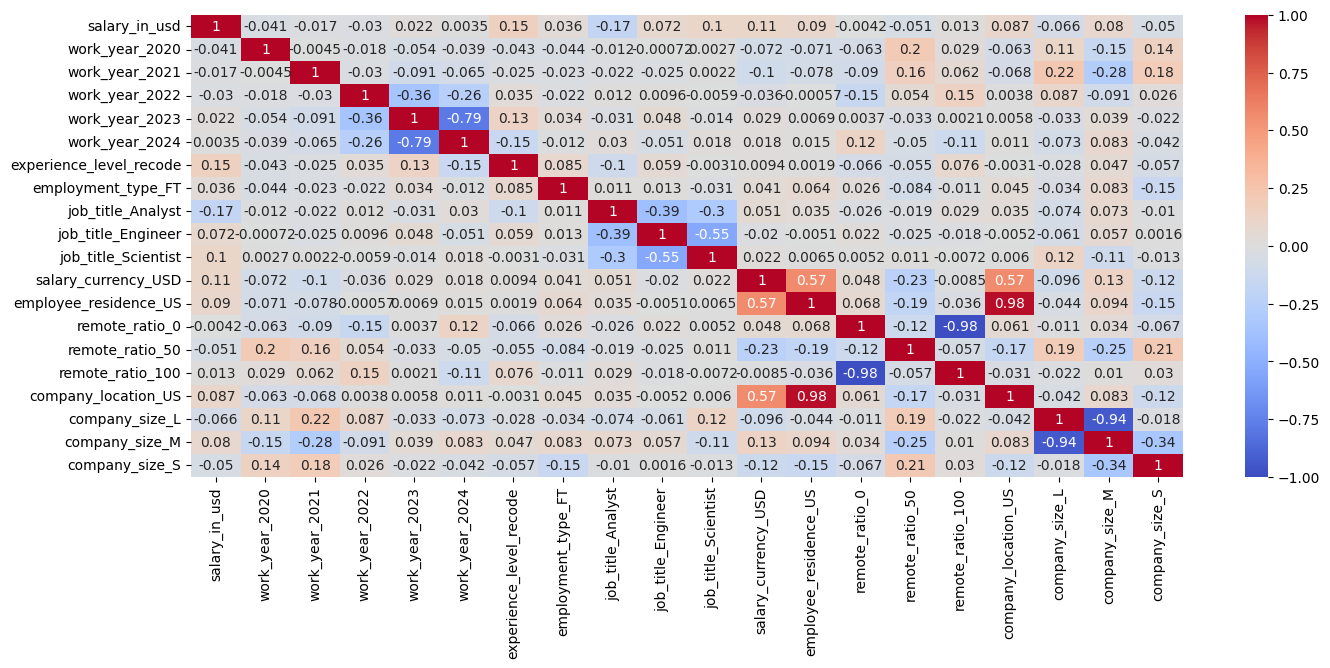

In [ ]:
plt.figure(figsize=(16, 6))
sns.heatmap(df_mod.corr(), vmin=-1.0, vmax=1.0, annot=True, cmap='coolwarm')
plt.show()

## Drop redundant columns

In [ ]:
df_mod.drop(columns=['work_year_2024', 'remote_ratio_100', 'employee_residence_US', 'company_size_L'], inplace = True)

In [ ]:
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8282 entries, 4 to 16532
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   salary_in_usd            8282 non-null   int64
 1   work_year_2020           8282 non-null   int64
 2   work_year_2021           8282 non-null   int64
 3   work_year_2022           8282 non-null   int64
 4   work_year_2023           8282 non-null   int64
 5   experience_level_recode  8282 non-null   int64
 6   employment_type_FT       8282 non-null   int64
 7   job_title_Analyst        8282 non-null   int64
 8   job_title_Engineer       8282 non-null   int64
 9   job_title_Scientist      8282 non-null   int64
 10  salary_currency_USD      8282 non-null   int64
 11  remote_ratio_0           8282 non-null   int64
 12  remote_ratio_50          8282 non-null   int64
 13  company_location_US      8282 non-null   int64
 14  company_size_M           8282 non-null   int64
 15  company_

In [ ]:
df_mod.corr()

salary_in_usd  work_year_2020  work_year_2021  \
salary_in_usd                 1.000000       -0.040624       -0.017421   
work_year_2020               -0.040624        1.000000       -0.004482   
work_year_2021               -0.017421       -0.004482        1.000000   
work_year_2022               -0.029842       -0.017659       -0.029716   
work_year_2023                0.022122       -0.054138       -0.091105   
experience_level_recode       0.150706       -0.043253       -0.024542   
employment_type_FT            0.036272       -0.044043       -0.023475   
job_title_Analyst            -0.174321       -0.011879       -0.022315   
job_title_Engineer            0.071846       -0.000719       -0.024980   
job_title_Scientist           0.102988        0.002654        0.002232   
salary_currency_USD           0.108277       -0.071569       -0.100619   
remote_ratio_0               -0.004153       -0.063254       -0.090491   
remote_ratio_50              -0.051343        0.196117        0.163763   
company_location_US           0.086874       -0.062544       -0.068048   
company_size_M                0.079990       -0.152836       -0.275136   
company_size_S               -0.049622        0.141553        0.184413   

                         work_year_2022  work_year_2023  \
salary_in_usd                 -0.029842        0.022122   
work_year_2020                -0.017659       -0.054138   
work_year_2021                -0.029716       -0.091105   
work_year_2022                 1.000000       -0.358934   
work_year_2023                -0.358934        1.000000   
experience_level_recode        0.034972        0.128811   
employment_type_FT            -0.021940        0.033661   
job_title_Analyst              0.011788       -0.031191   
job_title_Engineer             0.009553        0.047647   
job_title_Scientist           -0.005906       -0.014242   
salary_currency_USD           -0.036307        0.029321   
remote_ratio_0                -0.154772        0.003707   
remote_ratio_50                0.053541       -0.033451   
company_location_US            0.003815        0.005751   
company_size_M                -0.091330        0.039174   
company_size_S                 0.026157       -0.021901   

                         experience_level_recode  employment_type_FT  \
salary_in_usd                           0.150706            0.036272   
work_year_2020                         -0.043253           -0.044043   
work_year_2021                         -0.024542           -0.023475   
work_year_2022                          0.034972           -0.021940   
work_year_2023                          0.128811            0.033661   
experience_level_recode                 1.000000            0.085416   
employment_type_FT                      0.085416            1.000000   
job_title_Analyst                      -0.104792            0.011036   
job_title_Engineer                      0.058653            0.013323   
job_title_Scientist                    -0.003073           -0.030598   
salary_currency_USD                     0.009429            0.041119   
remote_ratio_0                         -0.066328            0.025643   
remote_ratio_50                        -0.054906           -0.083731   
company_location_US                    -0.003119            0.045161   
company_size_M                          0.046952            0.083013   
company_size_S                         -0.057472           -0.145070   

                         job_title_Analyst  job_title_Engineer  \
salary_in_usd                    -0.174321            0.071846   
work_year_2020                   -0.011879           -0.000719   
work_year_2021                   -0.022315           -0.024980   
work_year_2022                    0.011788            0.009553   
work_year_2023                   -0.031191            0.047647   
experience_level_recode          -0.104792            0.058653   
employment_type_FT                0.011036            0.013323   
job_title

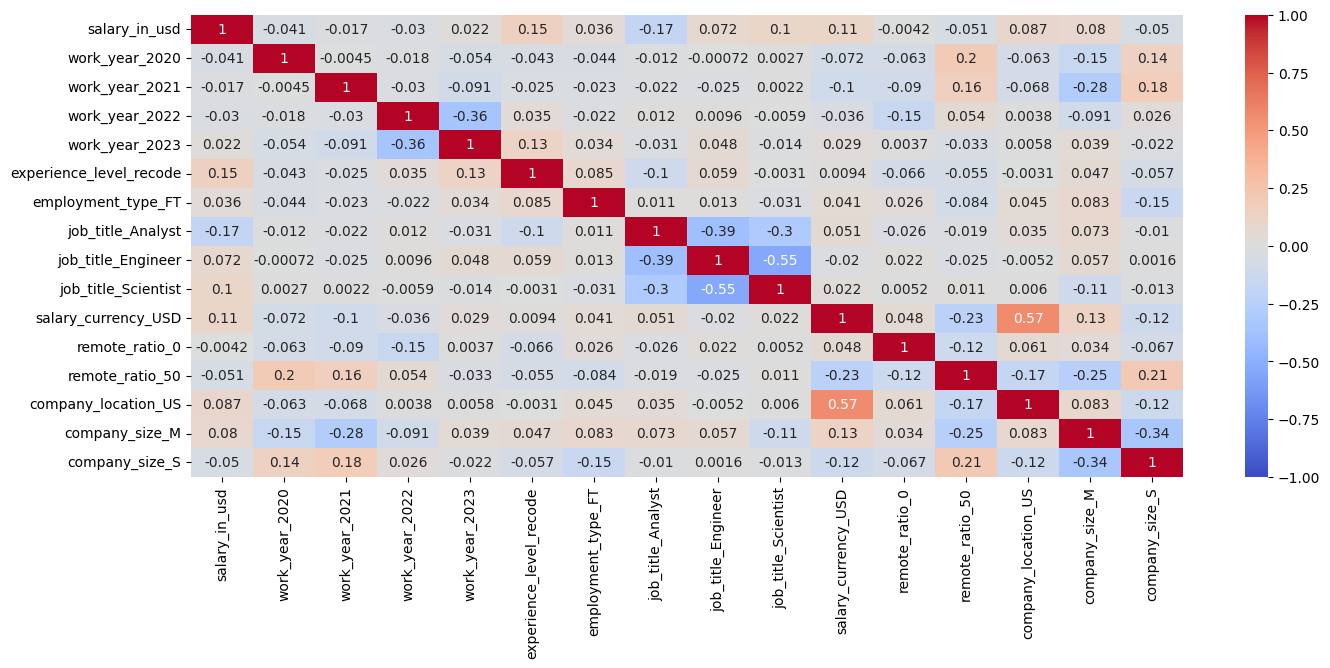

In [ ]:
plt.figure(figsize=(16, 6))
sns.heatmap(df_mod.corr(), vmin=-1.0, vmax=1.0, annot=True, cmap='coolwarm')
plt.show()

#Build models

## Split train-val-test data

In [ ]:
X = df_mod.copy()

In [ ]:
X.drop(columns=['salary_in_usd'], inplace = True)

In [ ]:
X = np.array(X)

In [ ]:
X.shape

(8282, 15)

In [ ]:
y = df_mod.salary_in_usd.copy()

In [ ]:
y = np.array(y)

In [ ]:
y.shape

(8282,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
X_t.shape

(7453, 15)

In [ ]:
y_t.shape

(7453,)

In [ ]:
X_test.shape

(829, 15)

In [ ]:
y_test.shape

(829,)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.1111, random_state=42)

In [ ]:
X_train.shape

(6624, 15)

In [ ]:
y_train.shape

(6624,)

In [ ]:
X_val.shape

(829, 15)

In [ ]:
y_val.shape

(829,)

## Linear Regression

### Train

In [ ]:
from sklearn import linear_model, tree, ensemble

In [ ]:
model = linear_model.LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.score(X_train, y_train)

0.07837315443580062

In [ ]:
model.score(X_val, y_val)

0.04321576047897924

In [ ]:
model.intercept_

94991.90979499098

In [ ]:
model.coef_

array([-6992.52448703,  2333.1059756 , -2276.26780026, -1054.49428842,
        5312.40877603, 12435.1736286 , -5596.75268044,  4578.05276411,
        7393.89494145, 11287.02010763,  -822.54577236, -1022.34279699,
        3869.83777893,  7194.6439301 , -1734.91468993])

### Evaluation on train set

In [ ]:
y_pred = model.predict(X_train)

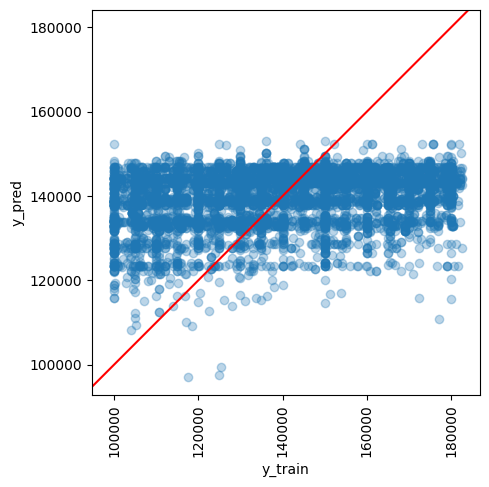

In [ ]:
plt.figure(figsize=(5,5))

plt.scatter(y_train, y_pred, alpha=0.3)
plt.axline([99000,99000],[180000,180000], color='red')

plt.xticks(rotation=90)
plt.xlabel('y_train')
plt.ylabel('y_pred')

plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
MAE = mean_absolute_error(y_train, y_pred)
MAE

18677.77688513984

In [ ]:
MSE = mean_squared_error(y_train, y_pred)
MSE

494637740.7082378

In [ ]:
RMSE = MSE**(1/2)
RMSE

22240.452799082977

In [ ]:
R2 = r2_score(y_train, y_pred)
R2

0.07837315443580062

In [ ]:
Adj_R2 = 1 - (1-R2) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
Adj_R2

0.07628108381178988

In [ ]:
train = ['train', MAE, MSE, RMSE, R2, Adj_R2]
train

['train',
 18677.77688513984,
 494637740.7082378,
 22240.452799082977,
 0.07837315443580062,
 0.07628108381178988]

### Evaluation on validation set

In [ ]:
y_pred = model.predict(X_val)

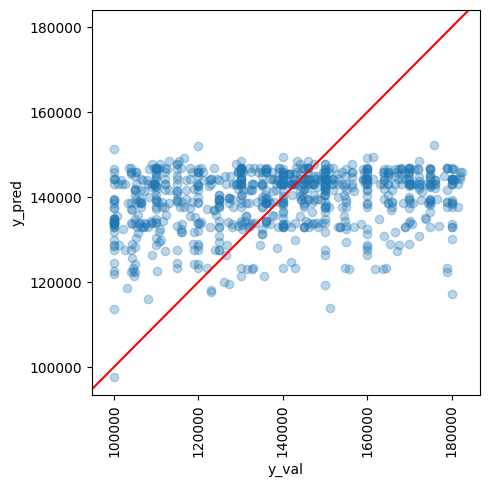

In [ ]:
plt.figure(figsize=(5,5))

plt.scatter(y_val, y_pred, alpha=0.3)
plt.axline([99000,99000],[180000,180000], color='red')

plt.xticks(rotation=90)
plt.xlabel('y_val')
plt.ylabel('y_pred')

plt.show()

In [ ]:
MAE = mean_absolute_error(y_true=y_val, y_pred=y_pred)
MAE

19103.295330536388

In [ ]:
MSE = mean_squared_error(y_true=y_val, y_pred=y_pred)
MSE

527761808.0192182

In [ ]:
RMSE = MSE**(1/2)
RMSE

22973.06701377111

In [ ]:
R2 = r2_score(y_val, y_pred)
R2

0.04321576047897924

In [ ]:
Adj_R2 = 1 - (1-R2) * (len(y_val)-1)/(len(y_val)-X_val.shape[1]-1)
Adj_R2

0.025562914731358966

In [ ]:
val = ['val', MAE, MSE, RMSE, R2, Adj_R2]
val

['val',
 19103.295330536388,
 527761808.0192182,
 22973.06701377111,
 0.04321576047897924,
 0.025562914731358966]

### Evaluation on test set

In [ ]:
y_pred = model.predict(X_test)

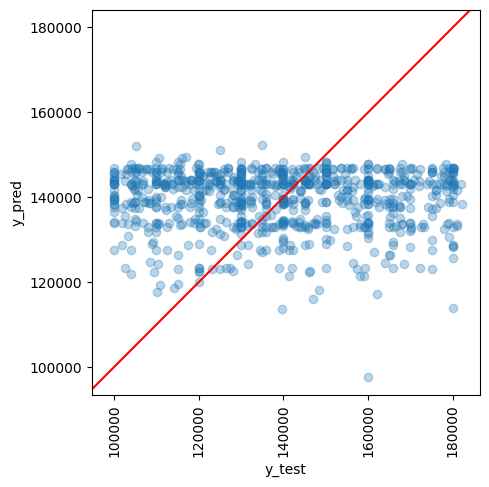

In [ ]:
plt.figure(figsize=(5,5))

plt.scatter(y_test, y_pred, alpha=0.3)
plt.axline([99000,99000],[180000,180000], color='red')

plt.xticks(rotation=90)
plt.xlabel('y_test')
plt.ylabel('y_pred')

plt.show()

In [ ]:
MAE = mean_absolute_error(y_true=y_test, y_pred=y_pred)
MAE

18115.514953668517

In [ ]:
MSE = mean_squared_error(y_true=y_test, y_pred=y_pred)
MSE

473111882.79845786

In [ ]:
RMSE = MSE**(1/2)
RMSE

21751.13520712098

In [ ]:
R2 = r2_score(y_test, y_pred)
R2

0.09087756164464833

In [ ]:
Adj_R2 = 1 - (1-R2) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

0.07410408492222487

In [ ]:
test = ['test', MAE, MSE, RMSE, R2, Adj_R2]
test

['test',
 18115.514953668517,
 473111882.79845786,
 21751.13520712098,
 0.09087756164464833,
 0.07410408492222487]

In [ ]:
result = pd.DataFrame([train, val, test], columns=['set', 'MAE', 'MSE', 'RMSE', 'R2', 'Adj_R2'])
result.set_index('set', inplace=True)
result

MAE           MSE          RMSE        R2    Adj_R2
set                                                                
train  18677.776885  4.946377e+08  22240.452799  0.078373  0.076281
val    19103.295331  5.277618e+08  22973.067014  0.043216  0.025563
test   18115.514954  4.731119e+08  21751.135207  0.090878  0.074104